In [1]:
#import packages
import base64
from PIL import Image
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas
import plotly.graph_objects as go

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm
import matplotlib.ticker as mtick

pd.options.display.float_format = '{:.0f}'.format

In [2]:
df = pd.read_csv('data/fertility2.csv')
df2 = pd.read_csv('data/Countries.csv')

In [3]:
# Initialize the app
app = dash.Dash(__name__)

# Define unique values for filters
available_columns = df2.columns.tolist()

# layout of the web application
app.layout = html.Div([
    html.H1("World Map Visualization"),

    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in available_columns],
        value='GDP',
        style={'width': '50%'}
    ),

    dcc.Graph(id='world-map', style={'width': '80%', 'margin': 'auto'}),
    
    
    dcc.RangeSlider(
        id='year-slider',
        min=df2['Year'].min(),
        max=df2['Year'].max(),
        step=1,
        marks={year: str(year) for year in range(df2['Year'].min(), df2['Year'].max() + 1)},
        value=[df2['Year'].min(), df2['Year'].max()],
        
    ),
    dcc.Markdown("""
    This web application allows you to visualize world data on a map. Select a column from the dropdown 
    to display different indicators. Use the range slider to choose a specific year or a range of years.
    [Learn more about the GDP Analystics](https://docs.google.com/presentation/d/1XN4id2BFbjkrEDdHOUZGQyLUL0yI8pP5/edit?usp=sharing&ouid=118130971179659842368&rtpof=true&sd=true)
    """)
    
])

@app.callback(
    Output('world-map', 'figure'),
    [Input('column-dropdown', 'value'),
     Input('year-slider', 'value')]
)
def update_world_map(selected_column, selected_years):
    filtered_df = df2[(df2['Year'] >= selected_years[0]) & (df2['Year'] <= selected_years[1])]
    fig = px.choropleth(
        filtered_df,
        locations='Country Name',
        locationmode='country names',
        animation_frame='Year',
        color=selected_column,
        hover_name='Country Name',
        title=f'World Map - {selected_column} by Country',
        color_continuous_scale=px.colors.sequential.Viridis,
        projection='natural earth',
        width=1000,
        height=600,
    )

    fig.update_geos(
        showcoastlines=True,
        coastlinecolor='black',
        showland=True,
        landcolor='lightgray'
    )

    fig.update_layout(
        coloraxis_colorbar=dict(title=selected_column)
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port = 8055)
#http://127.0.0.1:8055/ 

# Interactive Graph for Different Countries


In [4]:
# Create a Dash web application
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Interactive Graph for Different Countries"),

    html.Label("Select Y-axis"),
    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[{'label': col, 'value': col} for col in df2.columns[3:]],
        value=df2.columns[3:],  
        multi=False
    ),

    html.Label("Select Countries"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df2['Country Name'].unique()],
        value=df2['Country Name'].unique(), 
        multi=True
    ),

    dcc.Graph(id='line-plot')
])

@app.callback(
    Output('line-plot', 'figure'),
    [Input('y-axis-dropdown', 'value'),
     Input('country-dropdown', 'value')]
)
def update_graph(selected_y, selected_countries):
    filtered_df = df2[(df2['Country Name'].isin(selected_countries))]

    # Create line plot
    fig = px.line(
        filtered_df,
        x='Year',
        y=selected_y,
        color='Country Name',
        labels={'Year': 'Year', 'value': 'Selected Variables'},
        title='Selected Variables over Time'
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True,  port=8060)
    #http://127.0.0.1:8060/

In [5]:
df.columns
print('******************************************************************')

df.head(20)

******************************************************************


,Country Name,Country Code,Series Name,Series Code,2022 [YR2022],2021 [YR2021],2020 [YR2020],2019 [YR2019],2018 [YR2018],2017 [YR2017],...,1969 [YR1969],1968 [YR1968],1967 [YR1967],1966 [YR1966],1965 [YR1965],1964 [YR1964],1963 [YR1963],1962 [YR1962],1961 [YR1961],1960 [YR1960]
0,Afghanistan,AFG,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,54.4750267397973,54.1713988581692,53.7751348360726,53.290894238376,52.8844624265785,52.4815668980114,...,53.8326614172133,54.0996271436168,54.3749968781312,54.6583323341661,54.9466202662646,55.181682160916,55.3356554098572,55.4317786177159,55.4870229598163,55.5397840942487
1,Afghanistan,AFG,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.1306335411773,43.424542703341,43.8079121491391,44.2913519225043,44.7084445995593,45.1186155199624,...,43.4894284281289,43.2083750435887,42.9187974461615,42.6201405335114,42.3141327571861,42.0593887198501,41.8853766782279,41.7691668785528,41.6953029189524,41.6271864684651
2,Afghanistan,AFG,Population ages 65 and above (% of total popul...,SP.POP.65UP.TO.ZS,2.3943397190254,2.40405843848977,2.41695301478831,2.41775383911968,2.4070929738622,2.39981758202619,...,2.67791015465783,2.69199781279447,2.70620567570727,2.72152713232255,2.73924697654934,2.75892911923386,2.77896791191492,2.79905450373125,2.81767412123129,2.83302943728627
3,Afghanistan,AFG,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,..,..,41.58,47.487,47.394,47.31,...,..,..,..,..,..,..,..,..,..,..
4,Afghanistan,AFG,Wanted fertility rate (births per woman),SP.DYN.WFRT,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,..,363.674087113049,516.866797351726,500.52298078433,502.057099211089,530.14986261654,...,134.250359614672,134.012768293881,167.165674606148,143.103233209791,105.243195716467,85.5110734102311,82.0217375781519,60.9503638210144,62.4437034626929,62.3693745050559
6,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,-20.6999999939715,-2.35110067344623,3.911603419423,1.18922812838034,2.64700320195786,...,..,..,..,..,..,..,..,..,..,..
7,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,..,14583135236.5744,20143451705.7548,18904502222.2108,18418860354.4238,18896353155.8839,...,1408888922.22222,1373333366.66667,1673333417.77778,1399999966.66667,1006666637.77778,800000044.444444,751111191.111111,546666677.777778,548888895.555556,537777811.111111
8,Afghanistan,AFG,Gini index,SI.POV.GINI,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
9,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.53449831666733,2.85135765449931,3.13474690779163,2.90852909268743,2.88520797304849,2.86649214750073,...,2.37891654743303,2.34735064349307,2.29263788976095,2.25352401228011,2.21600692082533,2.13965084372647,2.07899662655224,2.01487886339461,1.92595161110872,..


## Modify the dataframe to better fit the model

In [6]:
df_melt = pd.melt(df, id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'], 
                  var_name='Year', value_name='Value')

In [7]:
df_melt.head()

,Series Name,Series Code,Country Name,Country Code,Year,Value
0,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,Afghanistan,AFG,2022 [YR2022],54.4750267397973
1,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,Afghanistan,AFG,2022 [YR2022],43.1306335411773
2,Population ages 65 and above (% of total popul...,SP.POP.65UP.TO.ZS,Afghanistan,AFG,2022 [YR2022],2.3943397190254
3,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,Afghanistan,AFG,2022 [YR2022],..
4,Wanted fertility rate (births per woman),SP.DYN.WFRT,Afghanistan,AFG,2022 [YR2022],..


In [8]:
df_melt['Year'] = df_melt['Year'].str.extract('(\d{4})')[0]

In [53]:
df_restructured = df_melt.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                                      columns='Series Name', 
                                      values='Value', 
                                      aggfunc='first').reset_index()

In [10]:
df_restructured.tail(10)

Series Name,Country Name,Country Code,Year,Births attended by skilled health staff (% of total),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Gini index,"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",...,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Refugee population by country or territory of asylum,Wanted fertility rate (births per woman),"Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)","Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)"
16748,Zimbabwe,ZWE,2013,..,4.064,19091020000,3.1967308868621,1408.36781031236,..,65.812,...,43.3704403806256,53.6349939395097,2.99456567986469,2.1632674727572,13555422,..,6387,..,..,..
16749,Zimbabwe,ZWE,2014,80,3.962,19495519600,1.48454262162193,1407.03429109916,..,65.874,...,43.1723631332054,53.799450668614,3.02818619818064,2.19139105592343,13855753,..,6076,..,..,..
16750,Zimbabwe,ZWE,2015,78.1,3.849,19963120600,2.02364999592871,1410.32917348908,..,65.913,...,42.8726705035847,54.0297035585535,3.09762593786182,2.13629423811133,14154937,..,6943,3.6,59.9,72.1
16751,Zimbabwe,ZWE,2016,..,3.771,20548678100,0.900955396308504,1421.78779140568,..,65.948,...,42.5178830716424,54.3147028294946,3.16741409886295,2.08180572500247,14452704,..,7423,..,..,..
16752,Zimbabwe,ZWE,2017,..,3.706,17584890936.6523,4.08026390333053,1192.10701198862,44.3,65.927,...,42.1522976488331,54.6145843622113,3.23311798895554,2.04361989880383,14751101,30.4,7566,..,..,..
16753,Zimbabwe,ZWE,2018,..,3.659,34156069918.0609,5.00986678330221,2269.17701232332,..,65.866,...,41.7987947795483,54.9078459311951,3.29335928925663,2.02053728777103,15052184,..,7795,..,..,..
16754,Zimbabwe,ZWE,2019,86,3.599,21832234925.5021,-6.33244640703352,1421.86859641758,50.3,65.79,...,41.4689727497105,55.1852465131395,3.34578073715007,1.98925274777043,15354608,38.3,8956,..,..,..
16755,Zimbabwe,ZWE,2020,..,3.545,21509698406.1116,-7.81695064681365,1372.69667433317,..,65.165,...,41.1560846287343,55.4676532352381,3.37626213602766,2.03111171035477,15669666,..,9261,..,..,..
16756,Zimbabwe,ZWE,2021,..,3.491,28371238665.5116,8.46801689759531,1773.92041088078,..,65.593,...,40.8933046900733,55.7433527470244,3.36334256290234,2.0457148779533,15993524,..,9483,..,..,..
16757,Zimbabwe,ZWE,2022,..,..,20678055597.7345,3.40000000028282,1266.99603069032,..,66.061,...,40.6340030355619,56.0441516109427,3.32184535349542,2.02403630999966,16320537,..,10475,..,..,..


# Interactive Graph for countries part 2

In [11]:
app = dash.Dash(__name__)

# Layout of the app
custom_styles = {
    'backgroundColor': '#f4f4f4',  # Background color
    'fontFamily': 'Arial, sans-serif',  # Font family
    'fontSize': 16,  # Font size
    'textAlign': 'center',  # Text alignment
    'padding': '20px'  # Padding
}
app.layout = html.Div(children=[
    html.H1("World GDP Analytics Dashboard", style={'textAlign': 'center', 'color': '#000000'}),

    html.Div([
        html.H2("Interactive Graph for Different Countries", style=custom_styles),

        html.Label("Select Y-axis"),
        dcc.Dropdown(
            id='y-axis-dropdown-1',
            options=[{'label': col, 'value': col} for col in df2.columns[3:]],
            value=df2.columns[3],
            multi=False
        ),

        html.Label("Select Countries"),
        dcc.Dropdown(
            id='country-dropdown-1',
            options=[{'label': country, 'value': country} for country in df2['Country Name'].unique()],
            value=df2['Country Name'].unique(),
            multi=True
        ),

        dcc.Graph(id='line-plot-1')
    ]),

    html.Div([
        html.H2("Interactive Graph with Dropdowns", style=custom_styles),

        html.Label("Select X-axis"),
        dcc.Dropdown(
            id='x-axis-dropdown',
            options=[
                {'label': 'Year', 'value': 'year'},
                * [{'label': col, 'value': col} for col in df_restructured.columns[3:]],
            ],
            value='year',
            multi=False
        ),

        html.Label("Select Y-axis"),
        dcc.Dropdown(
            id='y-axis-dropdown-2',
            options=[{'label': col, 'value': col} for col in df_restructured.columns[3:]],
            value=df_restructured.columns[3],
            multi=False
        ),

        html.Label("Select Countries"),
        dcc.Dropdown(
            id='country-dropdown-2',
            options=[{'label': country, 'value': country} for country in df_restructured['Country Name'].unique()],
            value=df_restructured['Country Name'].unique(),
            multi=True
        ),

        dcc.Graph(id='line-plot-2')
    ])
])


@app.callback(
    Output('line-plot-1', 'figure'),
    [Input('y-axis-dropdown-1', 'value'),
     Input('country-dropdown-1', 'value')]
)
def update_graph_1(selected_y, selected_countries):
    filtered_df = df2[(df2['Country Name'].isin(selected_countries))]

    # Create line plot
    fig = px.line(
        filtered_df,
        x='Year',
        y=selected_y,
        color='Country Name',
        labels={'Year': 'Year', 'value': 'Selected Variables'},
        title='Selected Variables over Time'
    )

    return fig

@app.callback(
    Output('line-plot-2', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown-2', 'value'),
     Input('country-dropdown-2', 'value')]
)
def update_graph_2(selected_x, selected_y, selected_countries):
    filtered_df = df_restructured[df_restructured['Country Name'].isin(selected_countries)]

    # Create line plot
    fig = px.line(
        filtered_df,
        x=selected_x if selected_x != 'year' else 'Year',
        y=selected_y,
        color='Country Name',
        labels={'value': 'Selected Variables'},
        title='Selected Variables over Time'
    )

    return fig
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True,  port=8000)
    #http://127.0.0.1:8060/

In [12]:
# replace column names to have '_' over ' '
df_restructured.columns.name = None  # Remove the name for columns
df_restructured.rename(columns=lambda x: x.replace(', ', '_').replace(' ', '_').lower(), inplace=True)

In [13]:
df_restructured = df_restructured.replace('..', np.nan)

In [14]:
columns_to_exclude = ['country_name', 'country_code', 'Series_Name']
for column in df_restructured.columns:    
    if column not in columns_to_exclude and df_restructured[column].dtype == 'object':
        df_restructured[column] = df_restructured[column].astype(float)

In [15]:
df.to_csv("processed_data.csv", index = False)

## Modelling phase

In [16]:
df_restructured.head()

,country_name,country_code,year,births_attended_by_skilled_health_staff_(%_of_total),fertility_rate_total_(births_per_woman),gdp_(current_us$),gdp_growth_(annual_%),gdp_per_capita_(current_us$),gini_index,labor_force_participation_rate_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate),...,population_ages_0-14_(%_of_total_population),population_ages_15-64_(%_of_total_population),population_ages_65_and_above_(%_of_total_population),population_growth_(annual_%),population_total,poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),refugee_population_by_country_or_territory_of_asylum,wanted_fertility_rate_(births_per_woman),women_making_their_own_informed_decisions_regarding_sexual_relations_contraceptive_use_and_reproductive_health_care_(%_of_women_age_15-49),women_participating_in_the_three_decisions_(own_health_care_major_household_purchases_and_visiting_family)_(%_of_women_age_15-49)
0,Afghanistan,AFG,1960,NaN,7,537777811,NaN,62,NaN,NaN,...,42,56,3,NaN,8622466,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,7,548888896,NaN,62,NaN,NaN,...,42,55,3,2,8790140,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,NaN,7,546666678,NaN,61,NaN,NaN,...,42,55,3,2,8969047,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,NaN,7,751111191,NaN,82,NaN,NaN,...,42,55,3,2,9157465,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,NaN,7,800000044,NaN,86,NaN,NaN,...,42,55,3,2,9355514,NaN,NaN,NaN,NaN,NaN


In [17]:
new_df = df_restructured[['year','country_name','gdp_(current_us$)']]

In [18]:
new_df.head()

,year,country_name,gdp_(current_us$)
0,1960,Afghanistan,537777811
1,1961,Afghanistan,548888896
2,1962,Afghanistan,546666678
3,1963,Afghanistan,751111191
4,1964,Afghanistan,800000044


In [19]:
new_df.shape

(16758, 3)

In [20]:
new_df = new_df.dropna()

In [21]:
new_df[new_df['country_name'] == 'United States']

,year,country_name,gdp_(current_us$)
15939,1960,United States,543300000000
15940,1961,United States,563300000000
15941,1962,United States,605100000000
15942,1963,United States,638600000000
15943,1964,United States,685800000000
...,...,...,...
15997,2018,United States,20533057312000
15998,2019,United States,21380976119000
15999,2020,United States,21060473613000
16000,2021,United States,23315080560000


In [22]:
scaler = StandardScaler()

In [23]:
f = open('summary.txt', 'w')
good_features = []
df_non_object = df_restructured.select_dtypes(include=[ 'number' ]).drop(columns = 'gdp_(current_us$)')
for col in df_non_object.columns:
    df_v2 = df_restructured[[col, 'gdp_(current_us$)']].dropna()
    
    scaled_array = scaler.fit_transform(df_v2)
    df_v2 = pd.DataFrame(scaled_array, columns=df_v2.columns)
    
    X = df_v2[col]
    y = df_v2['gdp_(current_us$)']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)

    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    lin_reg = sm.OLS(y_train, X_train).fit()

    # Predict on the testing set
    y_pred = lin_reg.predict(X_test)

    # Calculate MSE using the testing set
    mse = ((y_test - y_pred) ** 2).mean()

    print(f"Test RMSE: {math.sqrt(mse)}, mean_val: {y_pred.mean()}")
    print(lin_reg.summary())
    f.write(str(lin_reg.summary()))
    adjusted_r_squared = lin_reg.rsquared_adj
    if adjusted_r_squared > 0.1:
        good_features.append(col)

Test RMSE: 1.0284107129612794, mean_val: -0.004906475503311864
                            OLS Regression Results                            
Dep. Variable:      gdp_(current_us$)   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     297.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.71e-66
Time:                        18:38:54   Log-Likelihood:                -14904.
No. Observations:               10692   AIC:                         2.981e+04
Df Residuals:                   10690   BIC:                         2.983e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Test RMSE: 0.8434481225345639, mean_val: 0.006021139755516286
                            OLS Regression Results                            
Dep. Variable:      gdp_(current_us$)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3410
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.559
Time:                        18:38:55   Log-Likelihood:                -8697.9
No. Observations:                5983   AIC:                         1.740e+04
Df Residuals:                    5981   BIC:                         1.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025

Test RMSE: 0.8552533657771201, mean_val: 0.00192095150280391
                            OLS Regression Results                            
Dep. Variable:      gdp_(current_us$)   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     172.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.19e-39
Time:                        18:38:56   Log-Likelihood:                -12640.
No. Observations:                8779   AIC:                         2.528e+04
Df Residuals:                    8777   BIC:                         2.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Test RMSE: 1.1761478685672266, mean_val: -0.007591496572958308
                            OLS Regression Results                            
Dep. Variable:      gdp_(current_us$)   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     167.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           5.35e-38
Time:                        18:38:56   Log-Likelihood:                -14380.
No. Observations:               10585   AIC:                         2.876e+04
Df Residuals:                   10583   BIC:                         2.878e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:      gdp_(current_us$)   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     9.352
Date:                Wed, 13 Dec 2023   Prob (F-statistic):            0.00245
Time:                        18:38:57   Log-Likelihood:                -381.83
No. Observations:                 272   AIC:                             767.7
Df Residuals:                     270   BIC:                             774.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [24]:
good_features

['population_total', 'refugee_population_by_country_or_territory_of_asylum']

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_chart_types.py:264, in line(
    data_frame=     Country Name Country Code  Year  Agricultur...7                  42  

[5106 rows x 25 columns],
    x='Year',
    y=['Agriculture (% GDP)', 'Ease of Doing Business', 'Education Expenditure (% GDP)', 'Export (% GDP)', 'GDP', 'Health Expenditure (% GDP)', 'Import (% GDP)', 'Industry (% GDP)', 'Inflation Rate', 'R&D', 'Service (% GDP)', 'Unemployment', 'Population', 'Land', 'Continent Name', 'Export', 'Import', 'Education Expenditure', 'Health Expenditure', 'Net Trade', ...],
    line_group=None,
    color='Country Name',
    line_dash=None,
    symbol=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
   

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:3653, in Index.get_loc(self=Index(['country_name', 'country_code', 'year',
 ...)_(%_of_women_age_15-49)'],
      dtype='object'), key='Country Name')
   3652 try:
-> 3653     return self._engine.get_loc(casted_key)
        casted_key = 'Country Name'
        self = Index(['country_name', 'country_code', 'year',
       'births_attended_by_skilled_health_staff_(%_of_total)',
       'fertility_rate_total_(births_per_woman)', 'gdp_(current_us$)',
       'gdp_growth_(annual_%)', 'gdp_per_capita_(current_us$)', 'gini_index',
       'labor_force_participation_rate_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate)',
       'life_expectancy_at_birth_total_(years)',
       'low-birthweight_babies_(%_of_births)',
       'maternal_mortality_ratio_(national_estim

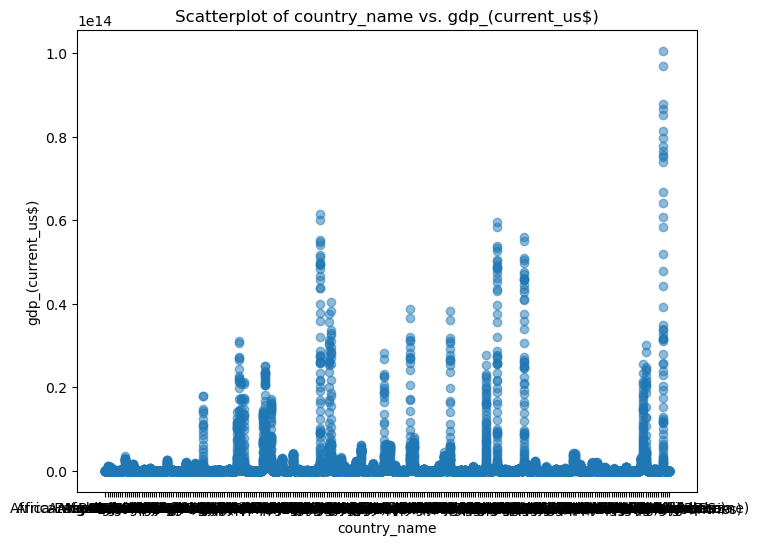

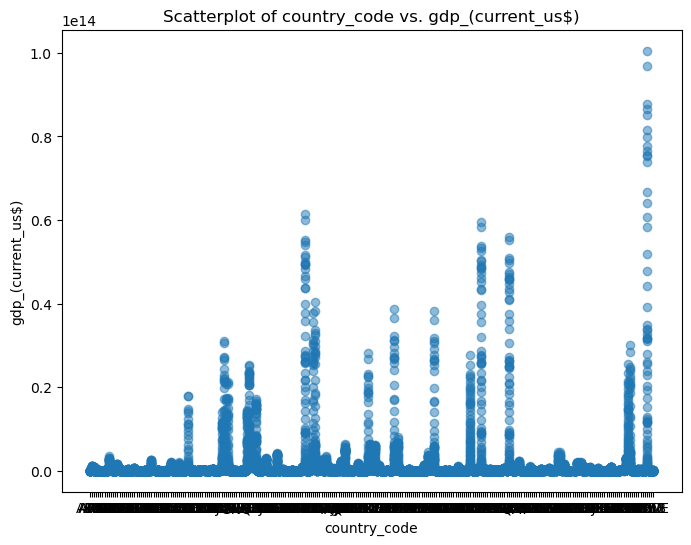

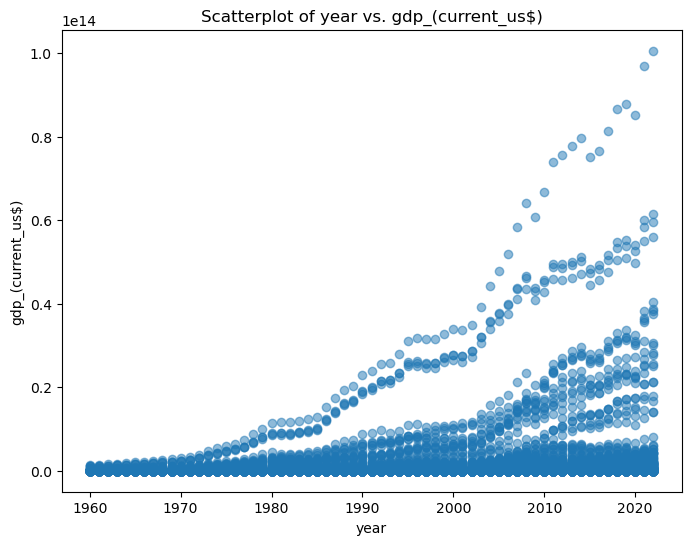

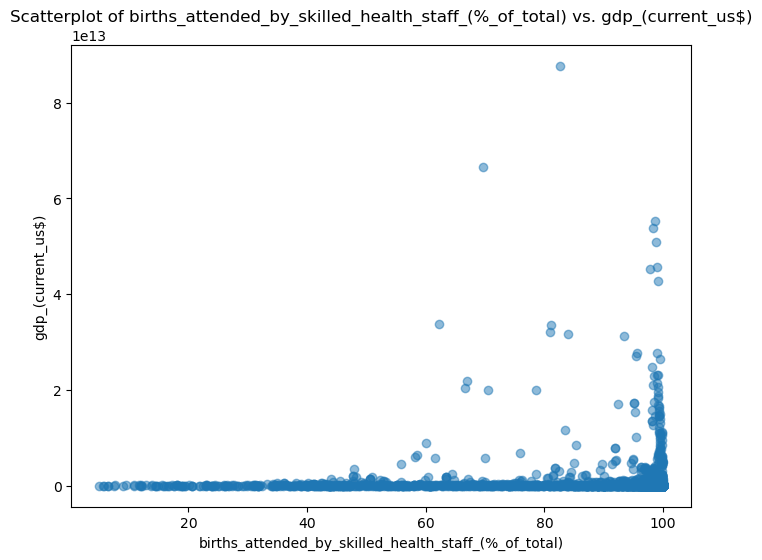

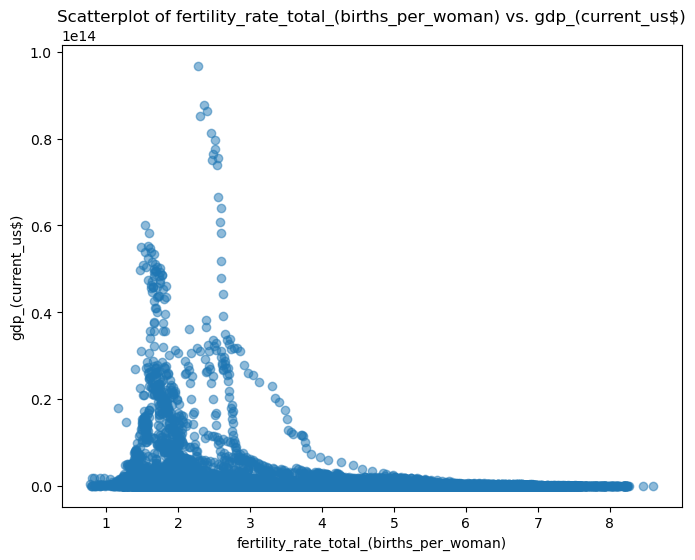

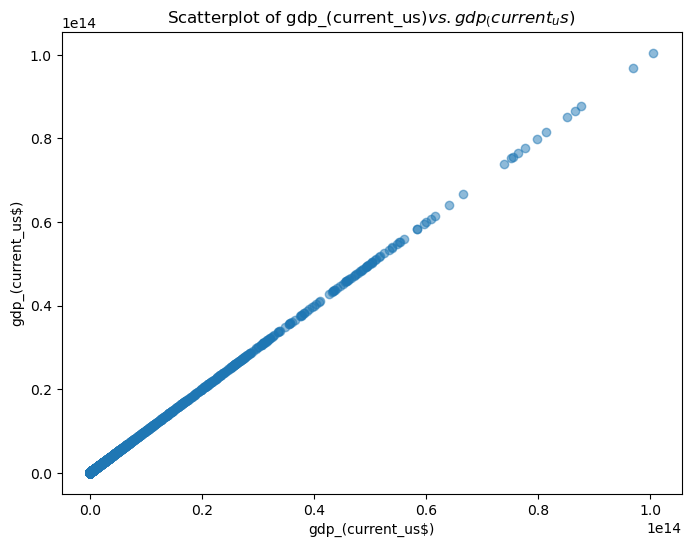

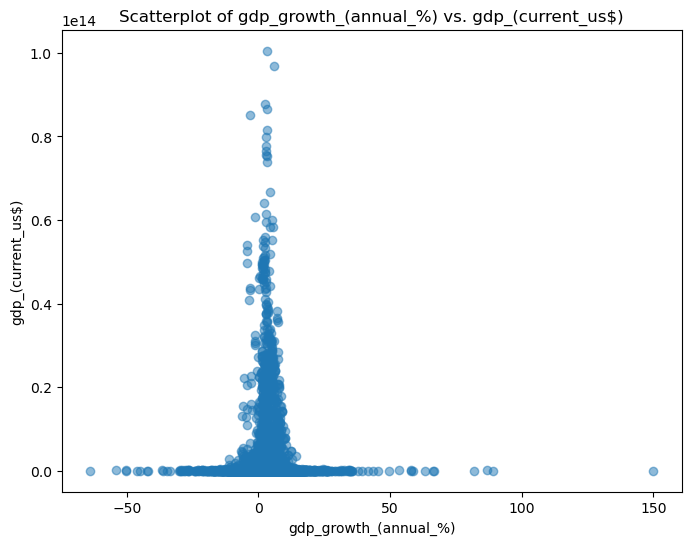

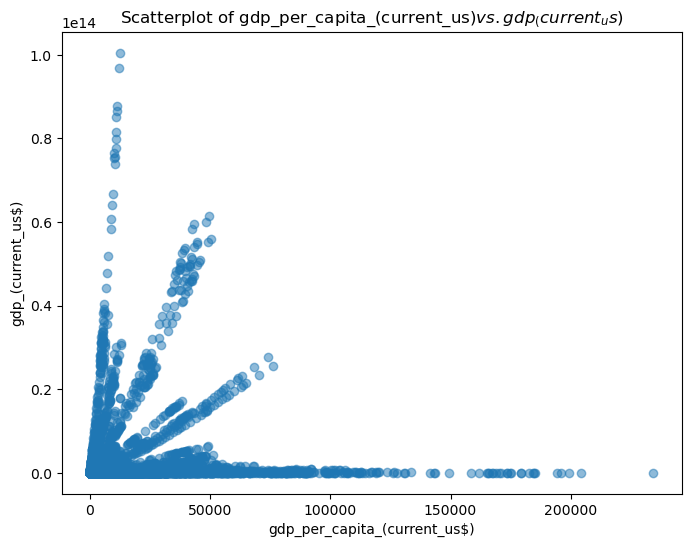

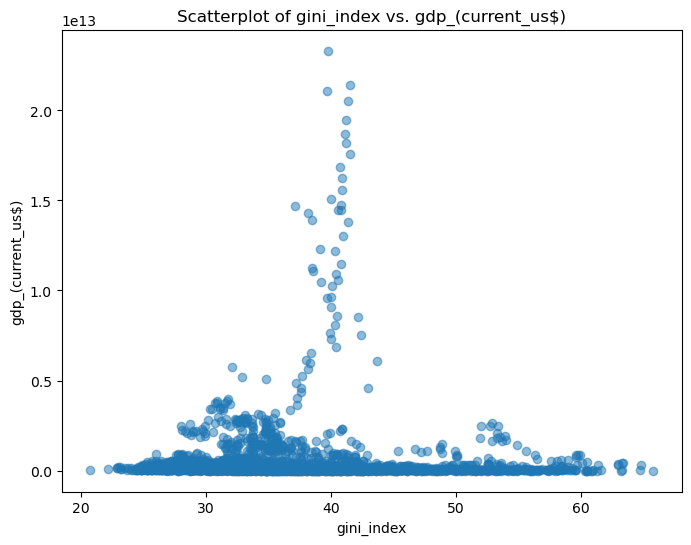

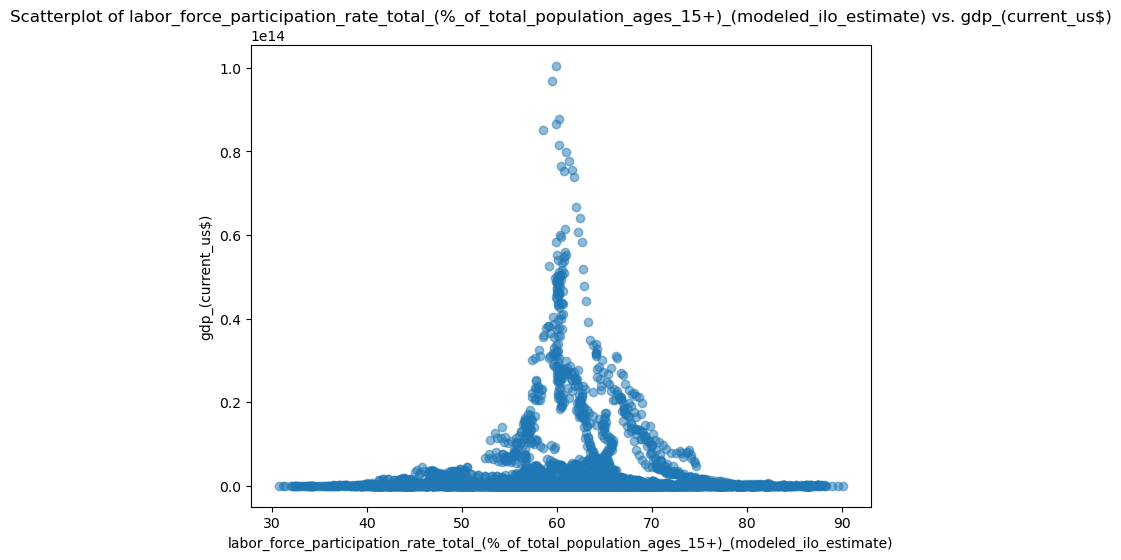

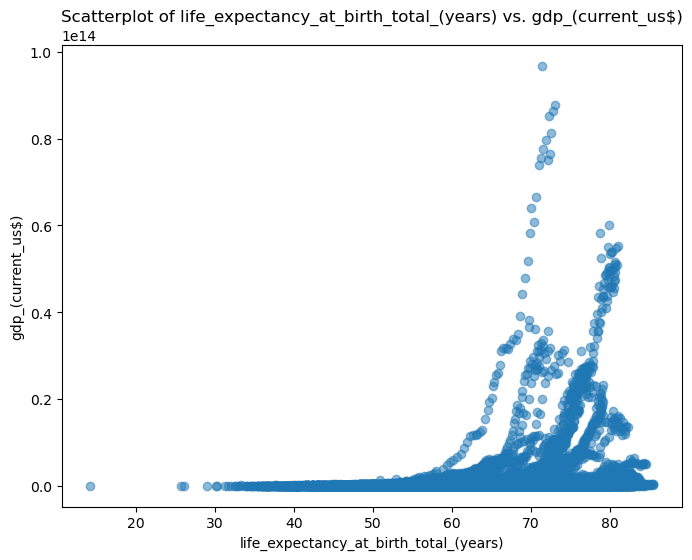

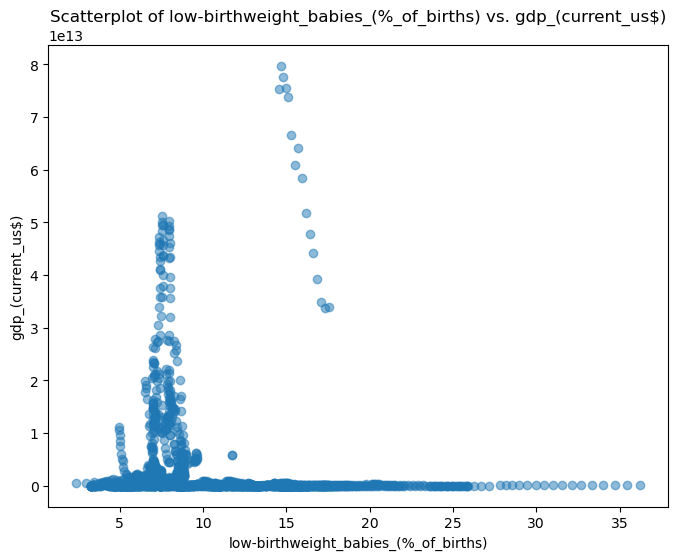

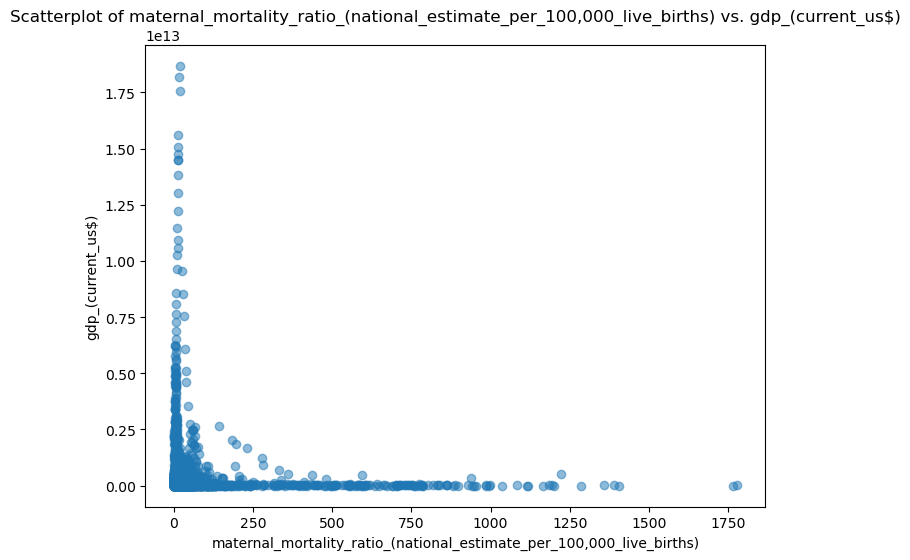

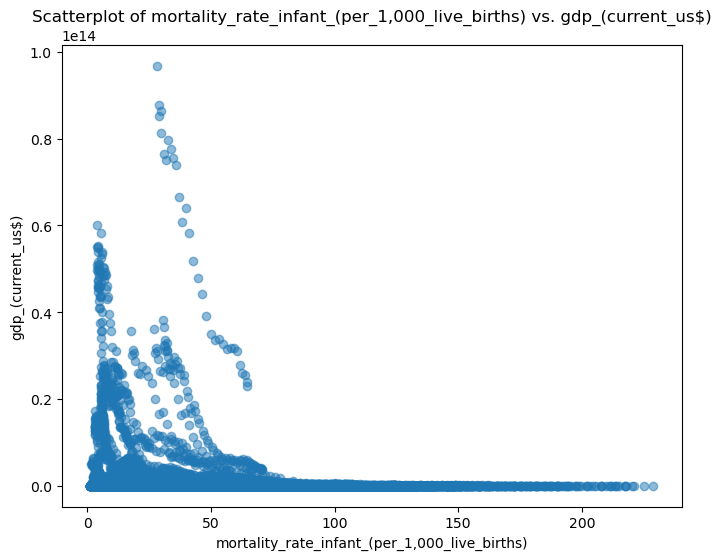

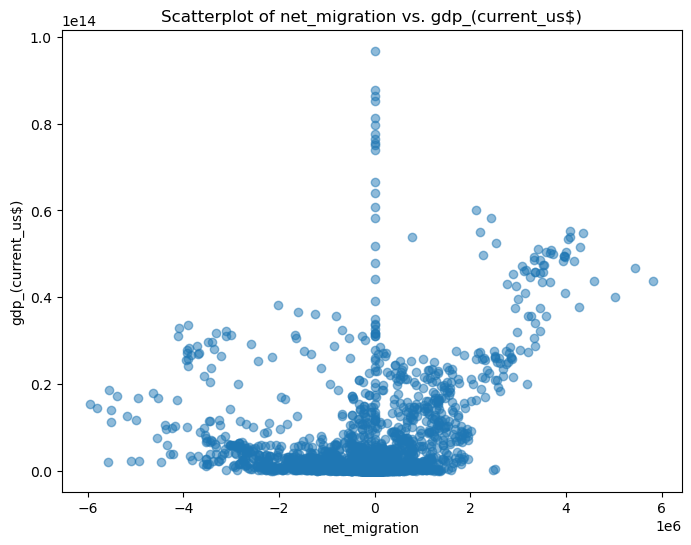

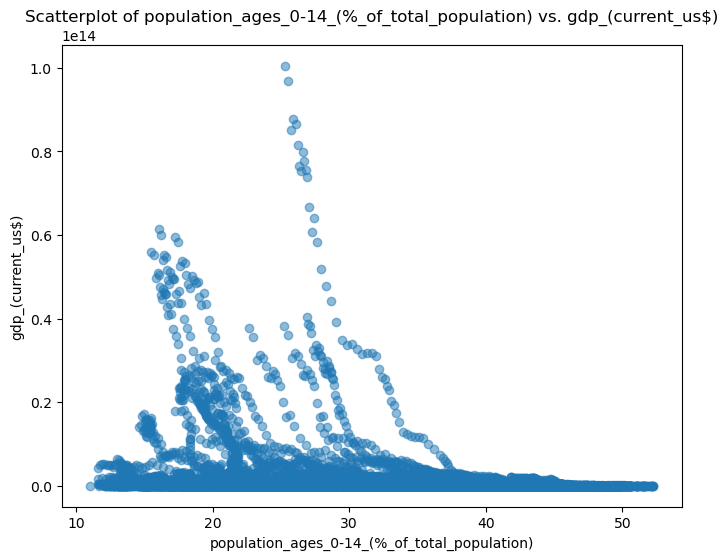

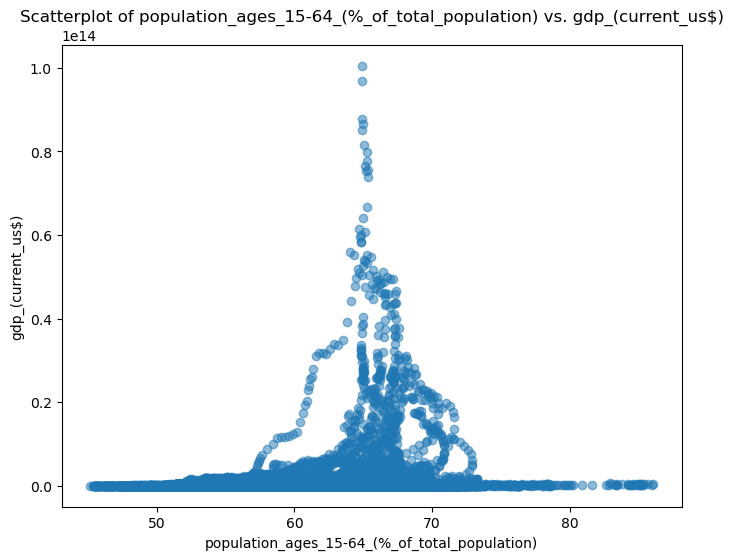

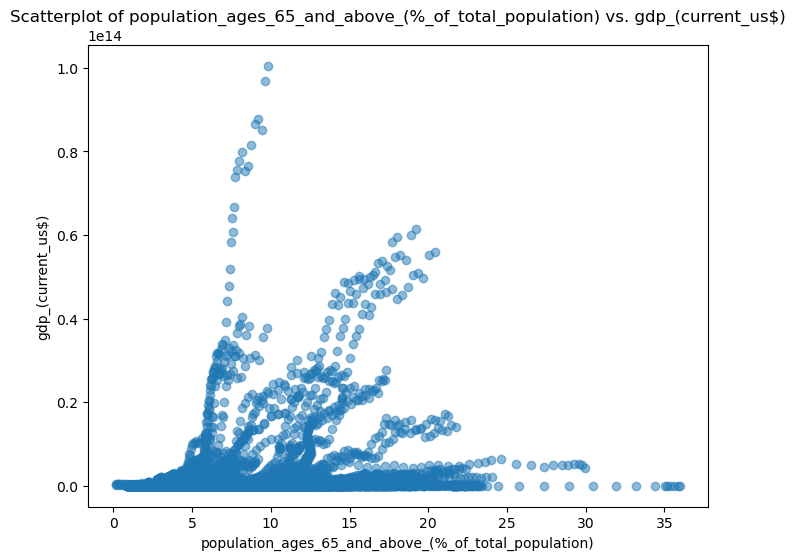

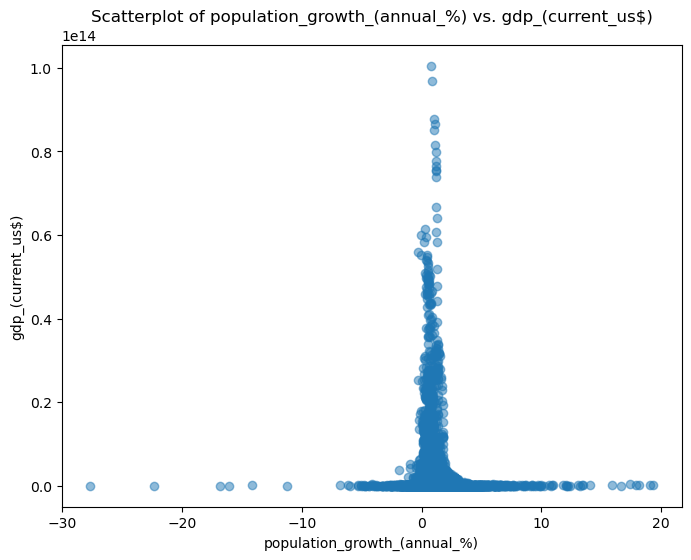

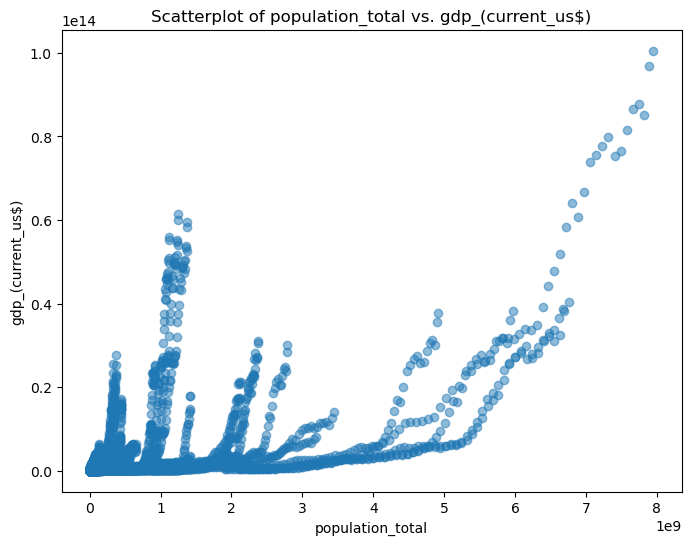

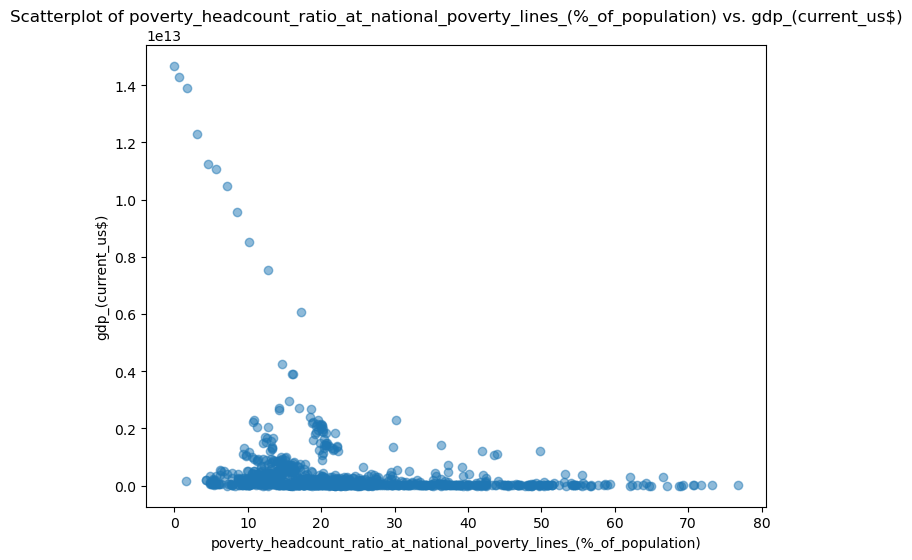

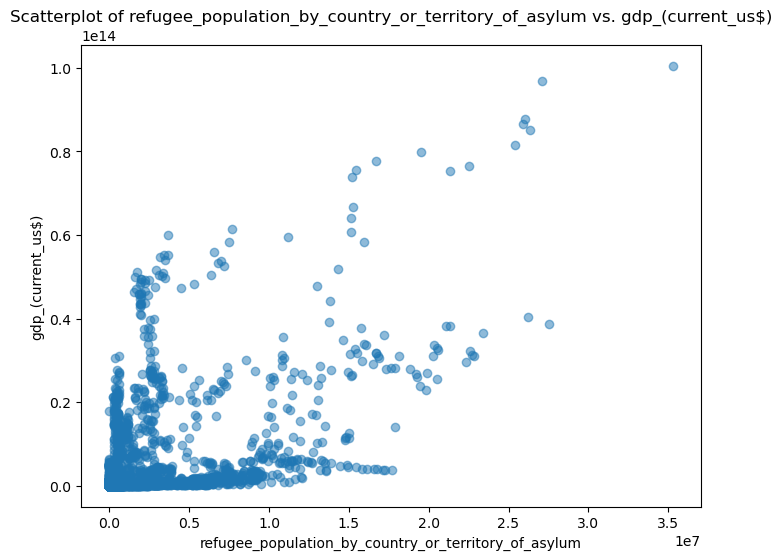

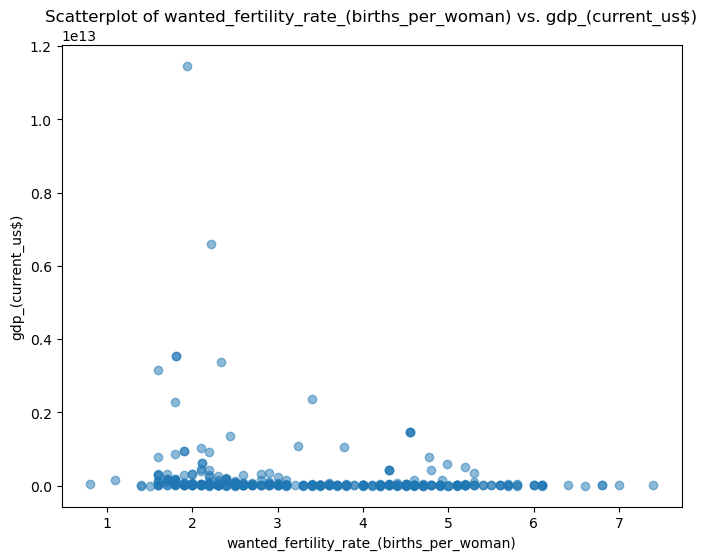

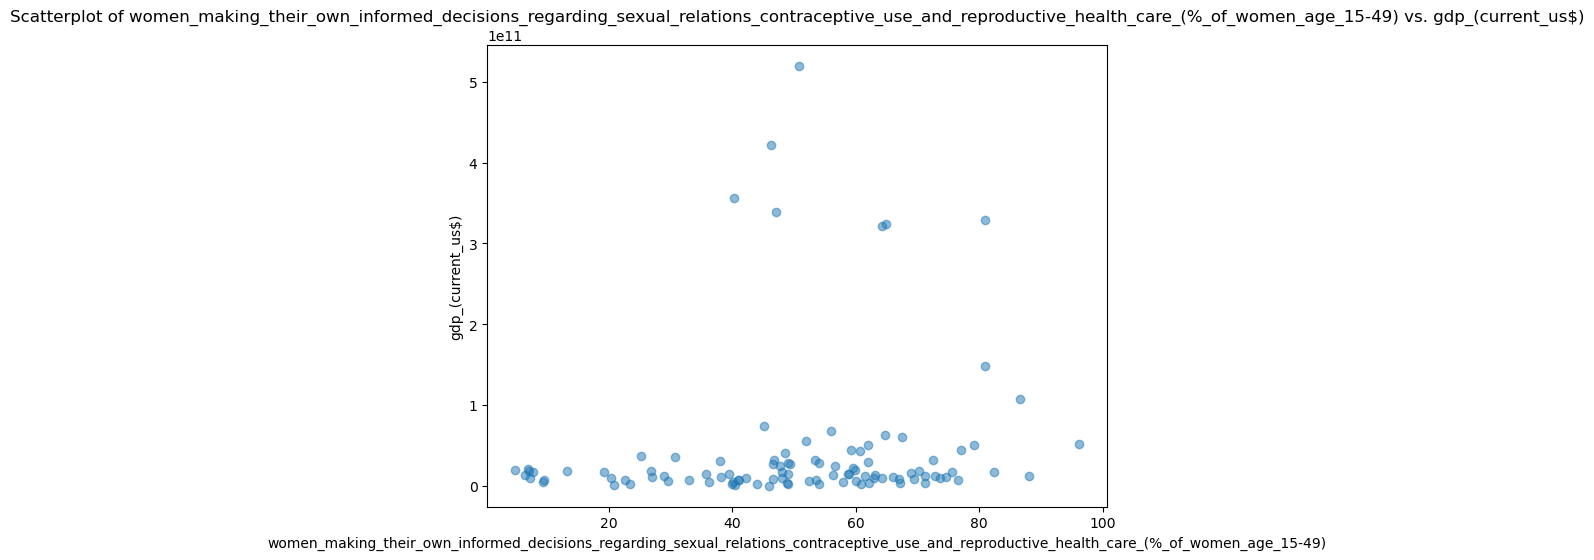

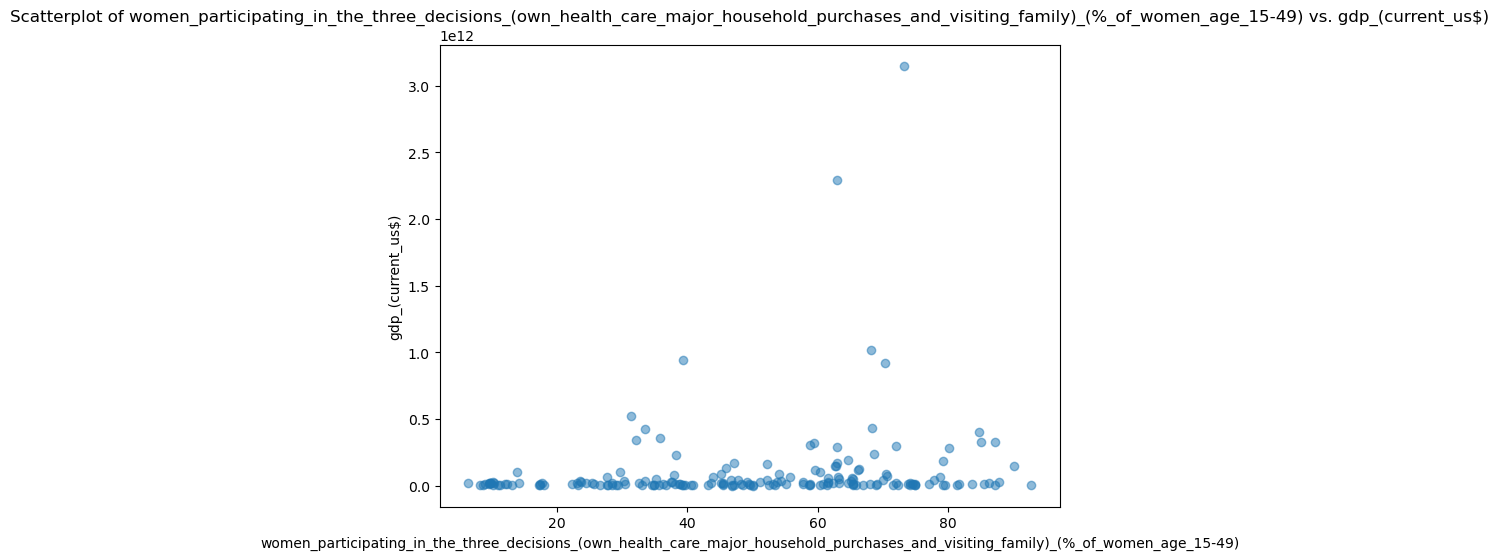

In [25]:
f = open('summary.txt', 'w')
# Loop through each feature in 'good_features' and create scatterplots
for feature in df_restructured:
    plt.figure(figsize=(8, 6))  # Set the figure size (adjust as needed)
    
    # Create a scatterplot
    plt.scatter(df_restructured[feature], df_restructured['gdp_(current_us$)'], alpha=0.5)
    
    # Set axis labels and title
    plt.xlabel(feature)
    plt.ylabel('gdp_(current_us$)')
    plt.title(f'Scatterplot of {feature} vs. gdp_(current_us$)')
    
    plt.show()  # Display the plot
    f.write(str(plt.show()))

In [26]:
df_restructured.head()

,country_name,country_code,year,births_attended_by_skilled_health_staff_(%_of_total),fertility_rate_total_(births_per_woman),gdp_(current_us$),gdp_growth_(annual_%),gdp_per_capita_(current_us$),gini_index,labor_force_participation_rate_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate),...,population_ages_0-14_(%_of_total_population),population_ages_15-64_(%_of_total_population),population_ages_65_and_above_(%_of_total_population),population_growth_(annual_%),population_total,poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),refugee_population_by_country_or_territory_of_asylum,wanted_fertility_rate_(births_per_woman),women_making_their_own_informed_decisions_regarding_sexual_relations_contraceptive_use_and_reproductive_health_care_(%_of_women_age_15-49),women_participating_in_the_three_decisions_(own_health_care_major_household_purchases_and_visiting_family)_(%_of_women_age_15-49)
0,Afghanistan,AFG,1960,NaN,7,537777811,NaN,62,NaN,NaN,...,42,56,3,NaN,8622466,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,7,548888896,NaN,62,NaN,NaN,...,42,55,3,2,8790140,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,NaN,7,546666678,NaN,61,NaN,NaN,...,42,55,3,2,8969047,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,NaN,7,751111191,NaN,82,NaN,NaN,...,42,55,3,2,9157465,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,NaN,7,800000044,NaN,86,NaN,NaN,...,42,55,3,2,9355514,NaN,NaN,NaN,NaN,NaN


In [27]:
# Filter the DataFrame for the last 30 years
current_year = 2023
last_30_years = current_year - 33

# Use boolean indexing to filter rows where 'year' is greater than or equal to last_30_years
df_restructured = df_restructured[df_restructured['year'] >= last_30_years]


In [28]:
df_usa = df_restructured[df_restructured['country_name'] == 'United States']

In [29]:
df_usa.drop(columns=['country_name', 'country_code'], inplace=True)

C:\Users\tanmi\AppData\Local\Temp\ipykernel_29668\3901815259.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
regions = [
    "Africa Eastern and Southern", "Africa Western and Central", "Arab World", 
    "Caribbean small states", "Central Europe and the Baltics", 
    "Early-demographic dividend", "East Asia & Pacific", 
    "East Asia & Pacific (excluding high income)", "East Asia & Pacific (IDA & IBRD countries)", 
    "Euro area", "Europe & Central Asia", "Europe & Central Asia (excluding high income)", 
    "Europe & Central Asia (IDA & IBRD countries)", "European Union", 
    "Fragile and conflict affected situations", 
    "Heavily indebted poor countries (HIPC)", "High income", "IBRD only", 
    "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", 
    "Late-demographic dividend", "Latin America & Caribbean", 
    "Latin America & Caribbean (excluding high income)", 
    "Latin America & the Caribbean (IDA & IBRD countries)", 
    "Least developed countries: UN classification", "Low & middle income", 
    "Low income", "Lower middle income", "Middle East & North Africa", 
    "Middle East & North Africa (excluding high income)", 
    "Middle East & North Africa (IDA & IBRD countries)", "Middle income", 
    "North America", "Not classified", "OECD members", "Other small states", 
    "Pacific island small states", "Post-demographic dividend", 
    "Pre-demographic dividend", "Small states", "South Asia", 
    "South Asia (IDA & IBRD)", "Sub-Saharan Africa", 
    "Sub-Saharan Africa (excluding high income)", "Sub-Saharan Africa (IDA & IBRD countries)", 
    "Upper middle income", "World"
]


# Assuming 'df' is your DataFrame and 'country_name' is the column of interest
df_restructured = df_restructured[~df_restructured['country_name'].isin(regions)]

In [31]:
relevant_countries = [
'United States',
'Bolivia',
'Australia',
'China',
'Germany',
'Morocco',
'Liberia'
]


## Part 1:

### showcase how economically successfull countries tend to have lower fertility rates as they become more prosperous

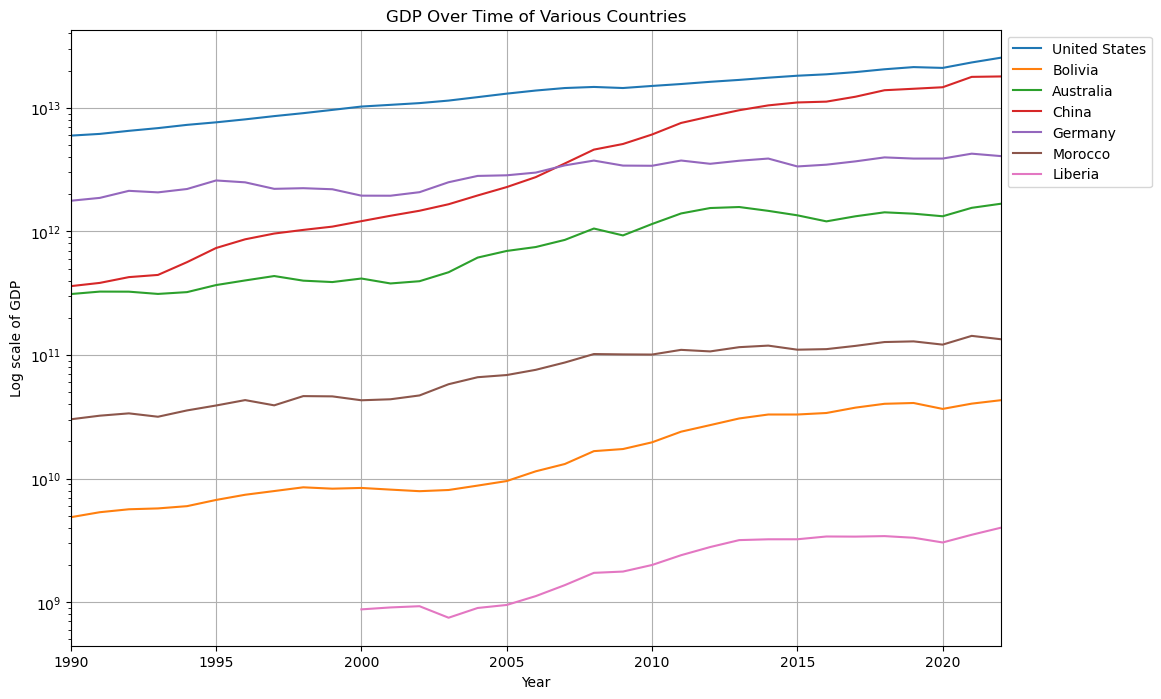

In [32]:
# Set up the plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Loop through each country and plot its GDP over the years with a different color
for country in relevant_countries:
    country_data = df_restructured[df_restructured['country_name'] == country]
    plt.plot(country_data['year'], country_data['gdp_(current_us$)'], label=country)

# Add labels, title, legend, and other plot details
plt.margins(x=0)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Log scale of GDP')
plt.title('GDP Over Time of Various Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend outside the plot

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()



Countries from various continets showing an increasing gdp over the last 30 years

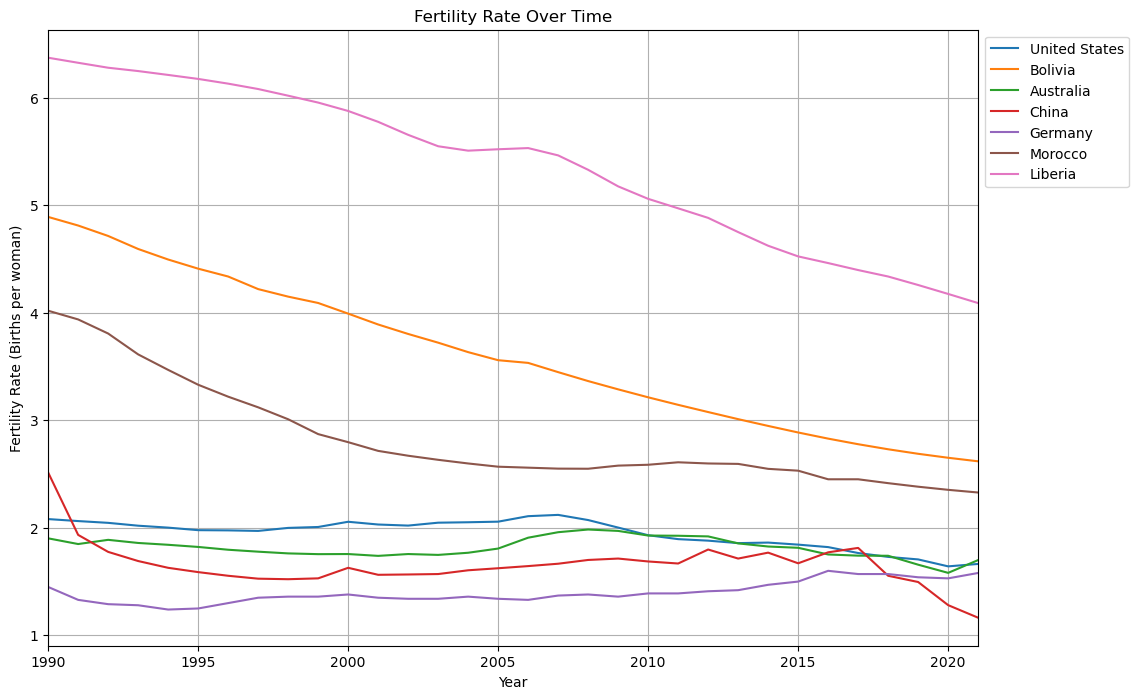

In [33]:
# Set up the plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Loop through each country and plot its GDP over the years with a different color
for country in relevant_countries:
    country_data = df_restructured[df_restructured['country_name'] == country]
    plt.plot(country_data['year'], country_data['fertility_rate_total_(births_per_woman)'], label=country)

# Add labels, title, legend, and other plot details
plt.margins(x=0) 
plt.xlabel('Year')
plt.ylabel('Fertility Rate (Births per woman)')
plt.title('Fertility Rate Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend outside the plot

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()

The same countries showcasing a decreasing fertility rate

- Countries passing a certain GDP quota tend to gravitate towards the fertility rate of 1 to 2 children per woman
- Countries with a lower GDP tend to trend towards a higher amount of children per woman
- As the countries with lower GDPs tend to get more wealthy they have a reciprocal drop in fertility rate (births per woman) indicating an inverse correlation between the two variables.

In [34]:
continents = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
    'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
    'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
    'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau',
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
    'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
    'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
    'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],

    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
    'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus',
    'Georgia', 'Hong Kong SAR, China', 'India', 'Indonesia', 'Iran, Islamic Rep.',
    'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Korea, Dem. People\'s Rep.',
    'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Lebanon',
    'Macao SAR, China', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal',
    'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russian Federation',
    'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan',
    'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
    'Uzbekistan', 'Vietnam', 'Yemen, Rep.'],

    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
    'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo',
    'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
    'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
    'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia',
    'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],

    'North America': ['Antigua and Barbuda', 'Bahamas, The', 'Barbados', 'Belize', 'Canada',
    'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador',
    'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'St. Kitts and Nevis', 'St. Lucia',
    'St. Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],

    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela, RB'],

    'Oceania': [ 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.',
    'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa',
    'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
}

# Categorize each country into its respective continent
df_restructured['continent'] = pd.NA
for continent, countries in continents.items():
    df_restructured.loc[df_restructured['country_name'].isin(countries), 'continent'] = continent

# Filter the DataFrame for the year 2019
df_2019 = df_restructured[df_restructured['year'] == 2019]

# Map each continent to a color
continent_colors = {
    'Africa': 'gold',
    'Asia': 'blue',
    'Europe': 'green',
    'North America': 'red',
    'South America': 'purple',
    'Oceania': 'orange' 
}


C:\Users\tanmi\AppData\Local\Temp\ipykernel_29668\2257375400.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



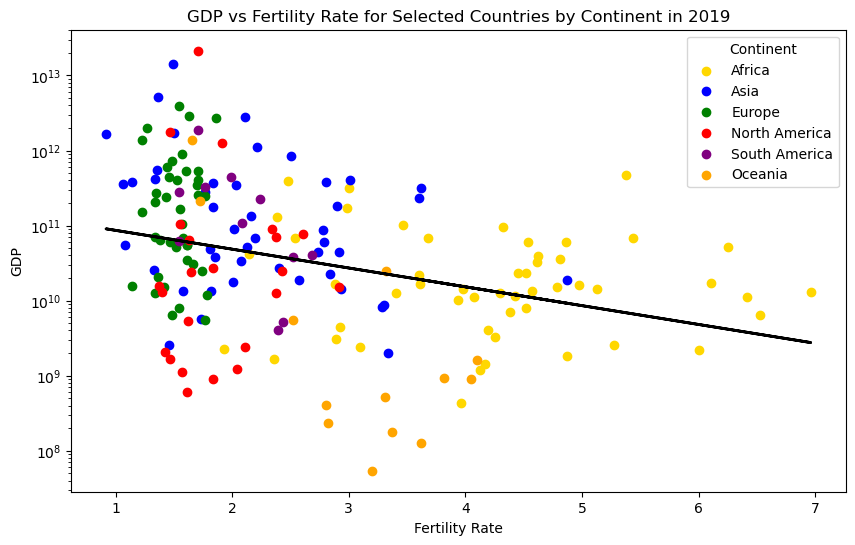

                            OLS Regression Results                            
Dep. Variable:      gdp_(current_us$)   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     22.95
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.24e-06
Time:                        18:39:53   Log-Likelihood:                -445.44
No. Observations:                 202   AIC:                             894.9
Df Residuals:                     200   BIC:                             901.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [35]:

# Drop any rows with missing values in 'fertility_rate_total_(births_per_woman)' or 'gdp_(current_us$)'
df_2019.dropna(subset=['fertility_rate_total_(births_per_woman)', 'gdp_(current_us$)'], inplace=True)

# Also, ensure that there are no negative or zero GDP values which could cause issues with log transformation
df_2019 = df_2019[df_2019['gdp_(current_us$)'] > 0]

# Log-transform the GDP values for the regression
y_log = np.log(df_2019['gdp_(current_us$)'])

# Add a constant to the predictor variable
x = df_2019['fertility_rate_total_(births_per_woman)']
x_with_const = sm.add_constant(x)

# Perform the linear regression using log-transformed GDP
model = sm.OLS(y_log, x_with_const).fit()

# Get the predictions and convert back from log-GDP to GDP for plotting
predictions_log = model.predict(x_with_const)
predictions = np.exp(predictions_log)

# Create the scatter plot and the regression line
plt.figure(figsize=(10,6))
for continent, color in continent_colors.items():
    subset = df_2019[df_2019['continent'] == continent]
    plt.scatter(subset['fertility_rate_total_(births_per_woman)'], subset['gdp_(current_us$)'], c=color, label=continent, marker='o')

# Plot the regression line
plt.plot(df_2019['fertility_rate_total_(births_per_woman)'], predictions, color='black', linewidth=2)

plt.xlabel('Fertility Rate')
plt.ylabel('GDP')
plt.title('GDP vs Fertility Rate for Selected Countries by Continent in 2019')
plt.legend(title='Continent')
plt.yscale('log')  # Use a log scale for the y-axis if the GDP values vary greatly
plt.show()
print(model.summary())


- The general trend for most countries is a decrease in fertility among the highest gdp countries

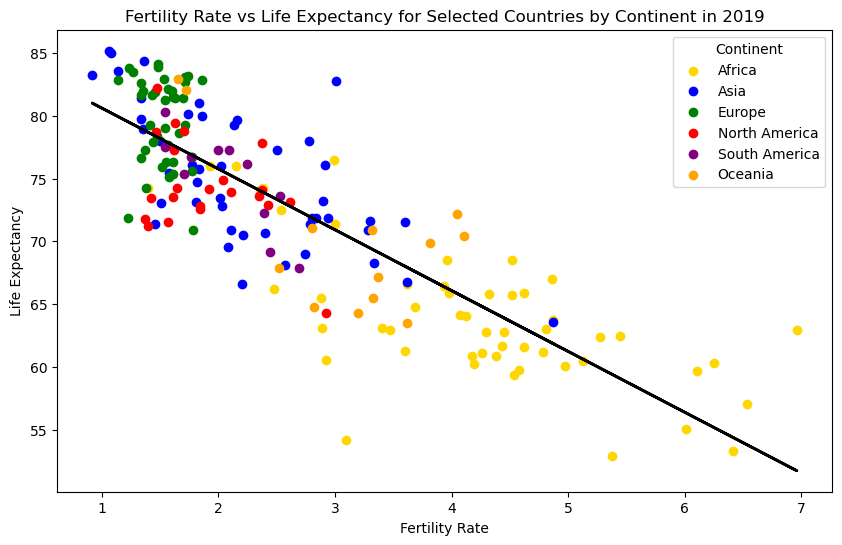

                                      OLS Regression Results                                      
Dep. Variable:     life_expectancy_at_birth_total_(years)   R-squared:                       0.697
Model:                                                OLS   Adj. R-squared:                  0.696
Method:                                     Least Squares   F-statistic:                     458.8
Date:                                    Wed, 13 Dec 2023   Prob (F-statistic):           1.47e-53
Time:                                            18:39:54   Log-Likelihood:                -569.50
No. Observations:                                     201   AIC:                             1143.
Df Residuals:                                         199   BIC:                             1150.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [36]:

# Drop any rows with missing values in 'fertility_rate_total_(births_per_woman)' or 'life_expectancy_at_birth_total_(years)'
df_2019.dropna(subset=['fertility_rate_total_(births_per_woman)', 'life_expectancy_at_birth_total_(years)'], inplace=True)

# Perform the linear regression
y = df_2019['life_expectancy_at_birth_total_(years)']
x = df_2019['fertility_rate_total_(births_per_woman)']
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
predictions = model.predict(x_with_const)

# Create the scatter plot and the regression line
plt.figure(figsize=(10,6))
for continent, color in continent_colors.items():
    subset = df_2019[df_2019['continent'] == continent]
    plt.scatter(subset['fertility_rate_total_(births_per_woman)'], subset['life_expectancy_at_birth_total_(years)'], c=color, label=continent, marker='o')

# Plot the regression line
plt.plot(df_2019['fertility_rate_total_(births_per_woman)'], predictions, color='black', linewidth=2)

plt.xlabel('Fertility Rate')
plt.ylabel('Life Expectancy')
plt.title('Fertility Rate vs Life Expectancy for Selected Countries by Continent in 2019')
plt.legend(title='Continent')
# Removed the log scale for life expectancy
plt.show()
print(model.summary())


Inverse linear relationship between fertility rates and life expectency.

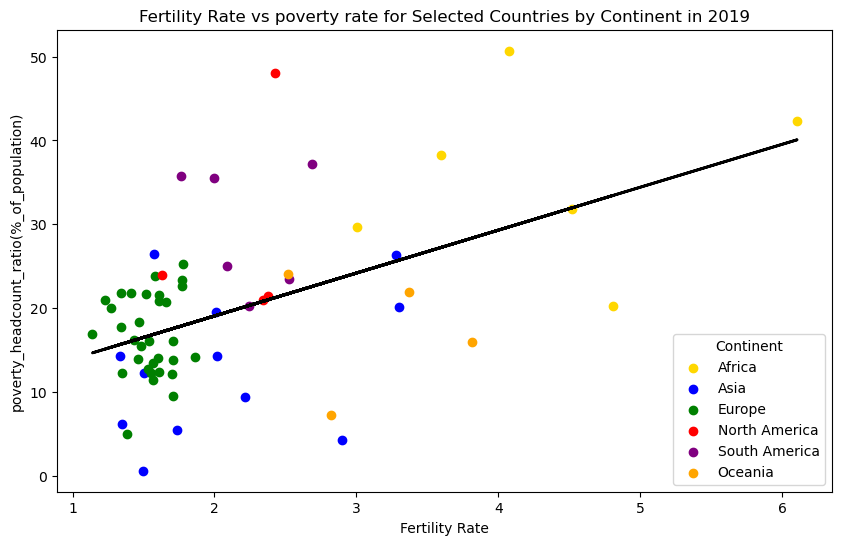

                                                     OLS Regression Results                                                    
Dep. Variable:     poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)   R-squared:                       0.242
Model:                                                                             OLS   Adj. R-squared:                  0.230
Method:                                                                  Least Squares   F-statistic:                     20.39
Date:                                                                 Wed, 13 Dec 2023   Prob (F-statistic):           2.78e-05
Time:                                                                         18:39:56   Log-Likelihood:                -235.69
No. Observations:                                                                   66   AIC:                             475.4
Df Residuals:                                                                       64   BIC:           

In [37]:
# Drop any rows with missing values in 'fertility_rate_total_(births_per_woman)' or 'life_expectancy_at_birth_total_(years)'
df_2019.dropna(subset=['fertility_rate_total_(births_per_woman)', 'poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)'], inplace=True)

# Perform the linear regression
y = df_2019['poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)']
x = df_2019['fertility_rate_total_(births_per_woman)']
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
predictions = model.predict(x_with_const)

# Create the scatter plot and the regression line
plt.figure(figsize=(10,6))
for continent, color in continent_colors.items():
    subset = df_2019[df_2019['continent'] == continent]
    plt.scatter(subset['fertility_rate_total_(births_per_woman)'], subset['poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)'], c=color, label=continent, marker='o')

# Plot the regression line
plt.plot(df_2019['fertility_rate_total_(births_per_woman)'], predictions, color='black', linewidth=2)

plt.xlabel('Fertility Rate')
plt.ylabel('poverty_headcount_ratio(%_of_population)')
plt.title('Fertility Rate vs poverty rate for Selected Countries by Continent in 2019')
plt.legend(title='Continent')
# Removed the log scale for life expectancy
plt.show()
print(model.summary())

A concentration of low poverty and fertility rate showcases how decreasing poverty results in decreasing fertility.

- All this to show that these countries which seem to be growing in economic power have a downward trend in fertility rates.
- The low p values indicate that all these variables have high correlation.

## Part 2:

### In recent years, more countries have shown signs for incoming population collapse.
### A quick google saerch indicaates thtat this issue is very much relevant.
### What are the implications of this?

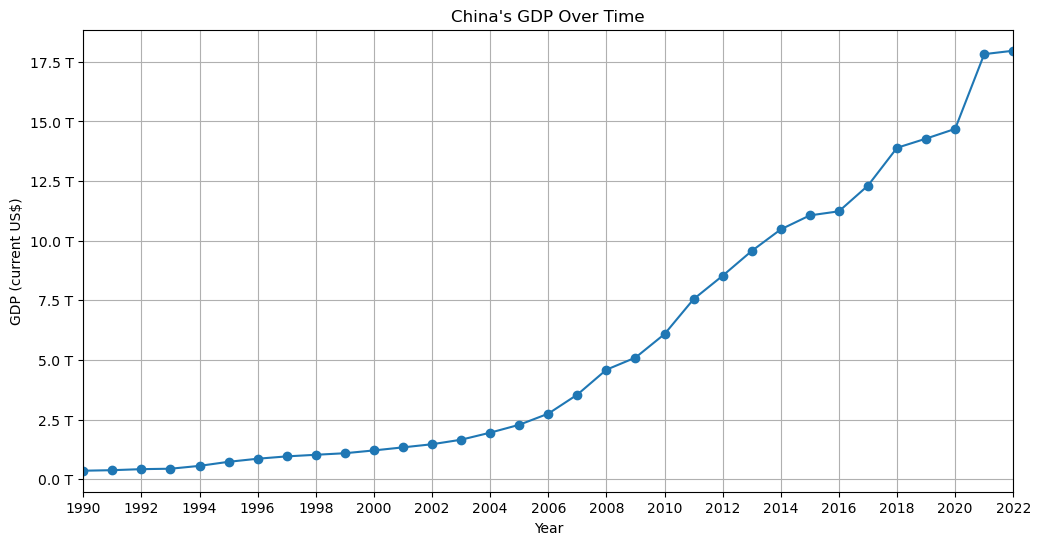

In [38]:

# Filter the DataFrame for China
china_gdp = df_restructured[df_restructured['country_name'] == 'China']

# Sort the DataFrame by year just in case it's not sorted
china_gdp_sorted = china_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(china_gdp_sorted['year'], china_gdp_sorted['gdp_(current_us$)'], marker='o')

# Add title and labels
plt.title('China\'s GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')

#adjust scale
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e12:.1f} T'))

start_year = int(df_restructured['year'].min())
end_year = int(df_restructured['year'].max())

# Set x-axis to show ticks every 2 years
plt.xticks(range(start_year, end_year + 1, 2))

# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Show the plot
plt.show()

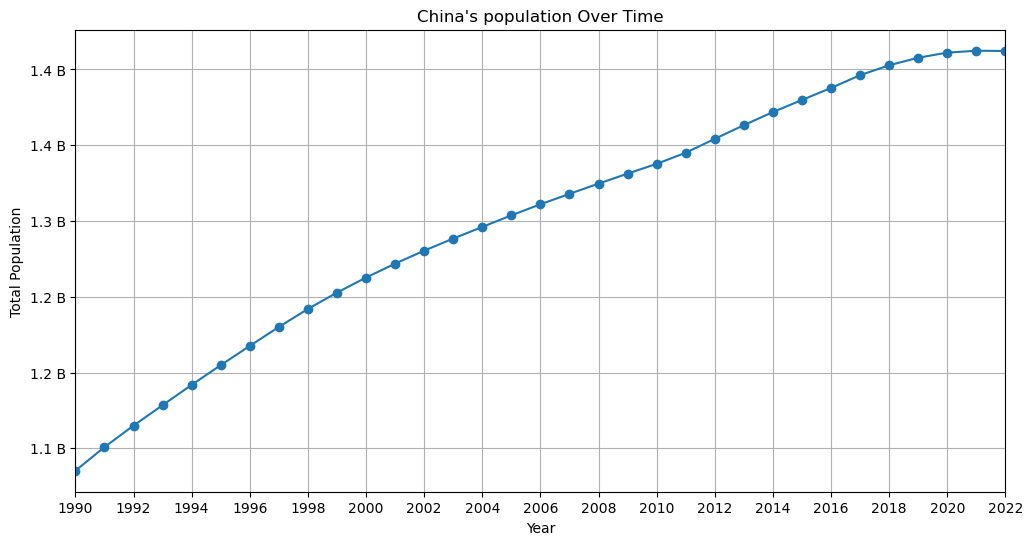

In [39]:
# Filter the DataFrame for China
china_gdp = df_restructured[df_restructured['country_name'] == 'China']

# Sort the DataFrame by year just in case it's not sorted
china_gdp_sorted = china_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(china_gdp_sorted['year'], china_gdp_sorted['population_total'], marker='o')

# Add title and labels
plt.title('China\'s population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')

#adjust scale
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f} B'))

start_year = int(df_restructured['year'].min())
end_year = int(df_restructured['year'].max())

# Set x-axis to show ticks every 2 years
plt.xticks(range(start_year, end_year + 1, 2))

# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Show the plot
plt.show()

- China's population has seen a general upwards trend, until the last few years where it has plateaued and begun to decline.

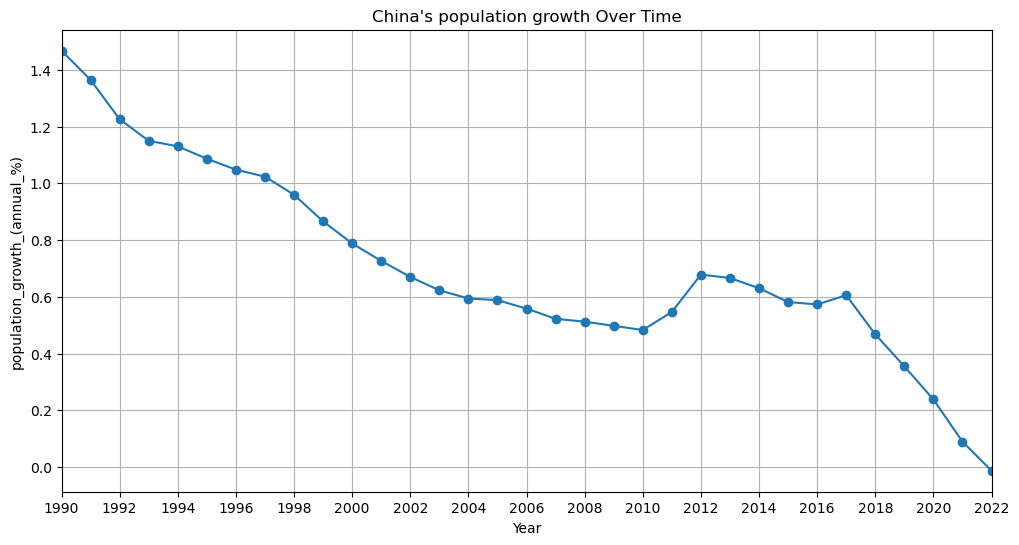

In [40]:
# Filter the DataFrame for China
china_gdp = df_restructured[df_restructured['country_name'] == 'China']

# Sort the DataFrame by year just in case it's not sorted
china_gdp_sorted = china_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(china_gdp_sorted['year'], china_gdp_sorted['population_growth_(annual_%)'], marker='o')

# Add title and labels
plt.title('China\'s population growth Over Time')
plt.xlabel('Year')
plt.ylabel('population_growth_(annual_%)')

start_year = int(df_restructured['year'].min())
end_year = int(df_restructured['year'].max())

# Set x-axis to show ticks every 2 years
plt.xticks(range(start_year, end_year + 1, 2))

# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Show the plot
plt.show()

- Their population growth is rapidly declining. And though it picked back up for a brief period from 2010 to 2012. It is decreasing to record numbers.

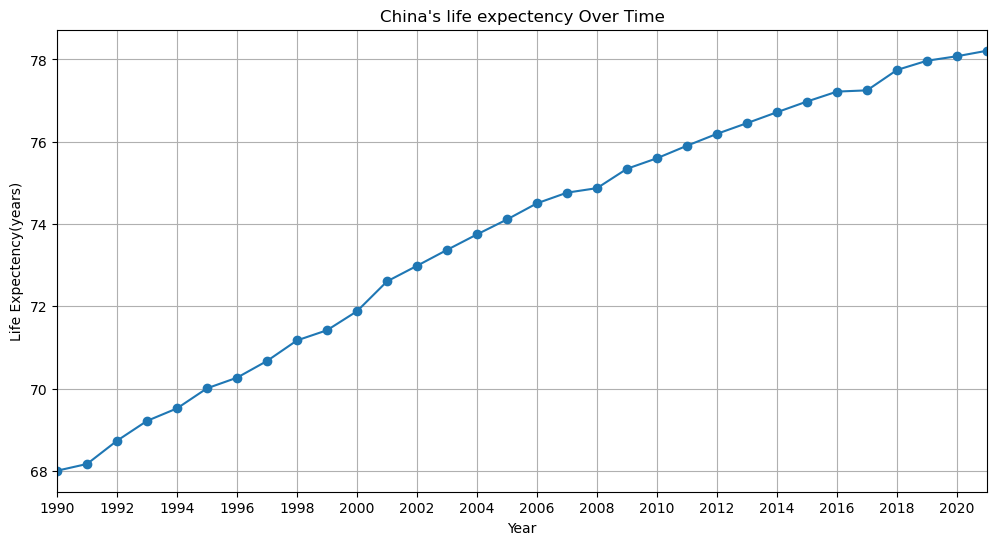

In [41]:
# Filter the DataFrame for China
china_gdp = df_restructured[df_restructured['country_name'] == 'China']

# Sort the DataFrame by year just in case it's not sorted
china_gdp_sorted = china_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(china_gdp_sorted['year'], china_gdp_sorted['life_expectancy_at_birth_total_(years)'], marker='o')

# Add title and labels
plt.title('China\'s life expectency Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectency(years)')

start_year = int(df_restructured['year'].min())
end_year = int(df_restructured['year'].max())

# Set x-axis to show ticks every 2 years
plt.xticks(range(start_year, end_year + 1, 2))

# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Show the plot
plt.show()

- This life expectency graph corroborates this idea further. 
- For many years China's population has grown as a function of their senior population.
- Not only is China's working population gradually decreasing as fertility rates go down, their increasing senior population means more resources will have to be allocated to senior care, with less working people to generate the needed revenue. 

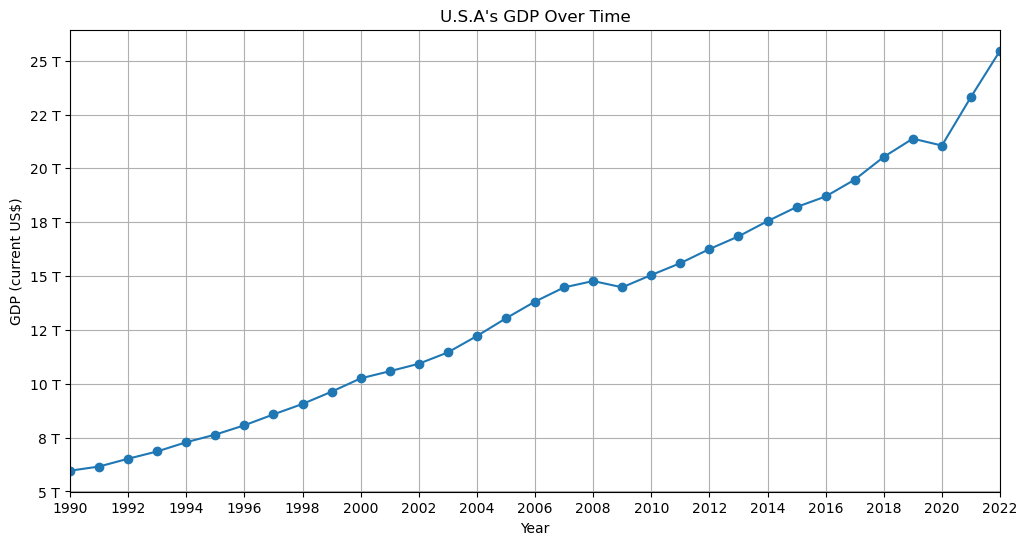

In [42]:

# Filter the DataFrame for China
usa_gdp = df_restructured[df_restructured['country_name'] == 'United States']

# Sort the DataFrame by year just in case it's not sorted
usa_gdp_sorted = usa_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(usa_gdp_sorted['year'], usa_gdp_sorted['gdp_(current_us$)'], marker='o')

# Add title and labels
plt.title('U.S.A\'s GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')

start_year = int(df_restructured['year'].min())
end_year = int(df_restructured['year'].max())

# Set x-axis to show ticks every 2 years
plt.xticks(range(start_year, end_year + 1, 2))

#adjust scale
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e12:.0f} T'))
# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Show the plot
plt.show()

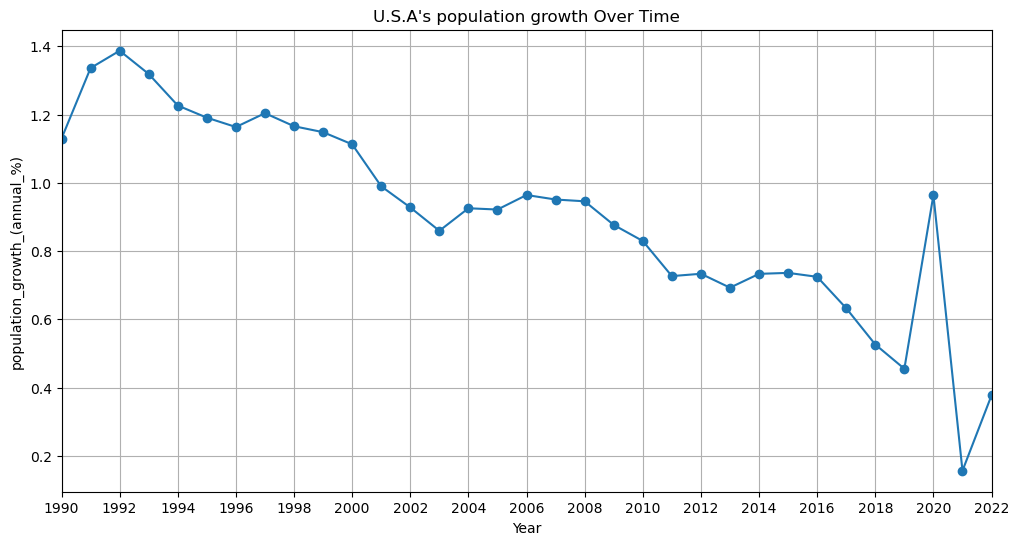

In [43]:
# Filter the DataFrame for China
usa_gdp = df_restructured[df_restructured['country_name'] == 'United States']

# Sort the DataFrame by year just in case it's not sorted
usa_gdp_sorted = usa_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(usa_gdp_sorted['year'], usa_gdp_sorted['population_growth_(annual_%)'], marker='o')

# Add title and labels
plt.title('U.S.A\'s population growth Over Time')
plt.xlabel('Year')
plt.ylabel('population_growth_(annual_%)')

start_year = int(df_restructured['year'].min())
end_year = int(df_restructured['year'].max())

# Set x-axis to show ticks every 2 years
plt.xticks(range(start_year, end_year + 1, 2))

# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Show the plot
plt.show()

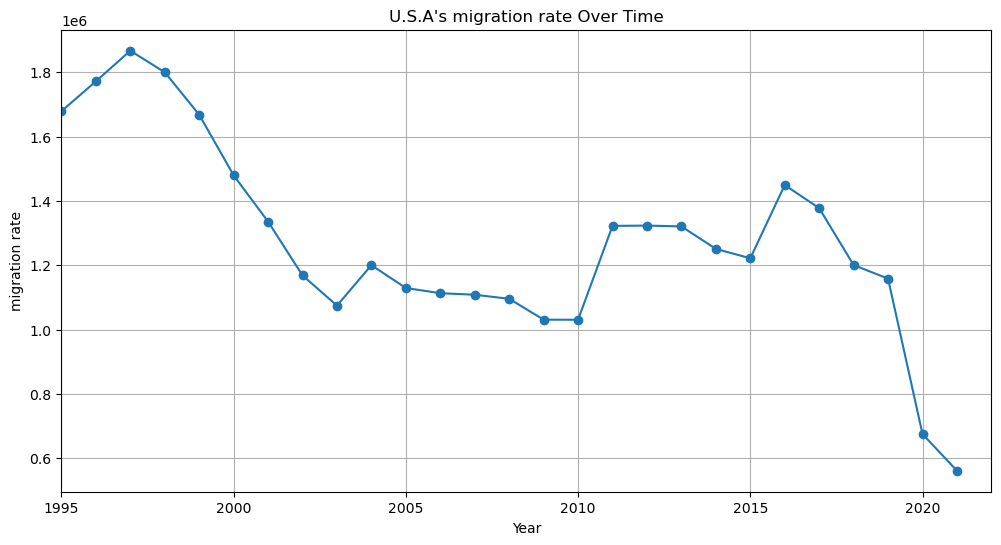

In [44]:
# Filter the DataFrame for China
usa_gdp = df_restructured[df_restructured['country_name'] == 'United States']

# Sort the DataFrame by year just in case it's not sorted
usa_gdp_sorted = usa_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(usa_gdp_sorted['year'], usa_gdp_sorted['net_migration'], marker='o')

# Add title and labels
plt.title('U.S.A\'s migration rate Over Time')
plt.xlabel('Year')
plt.ylabel('migration rate')

plt.xlim(1995, df_restructured['year'].max())

# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Show the plot
plt.show()

- The U.S. shows a similar trend. As its GDP increases, it's population growth decreases.
- The U.S. population growth has decreased as immigration has decreased. 
- From 2016 to 2020, a time when America imposed strict immigration policy, the population growth drastically decreased, save foran outlier in 2020.

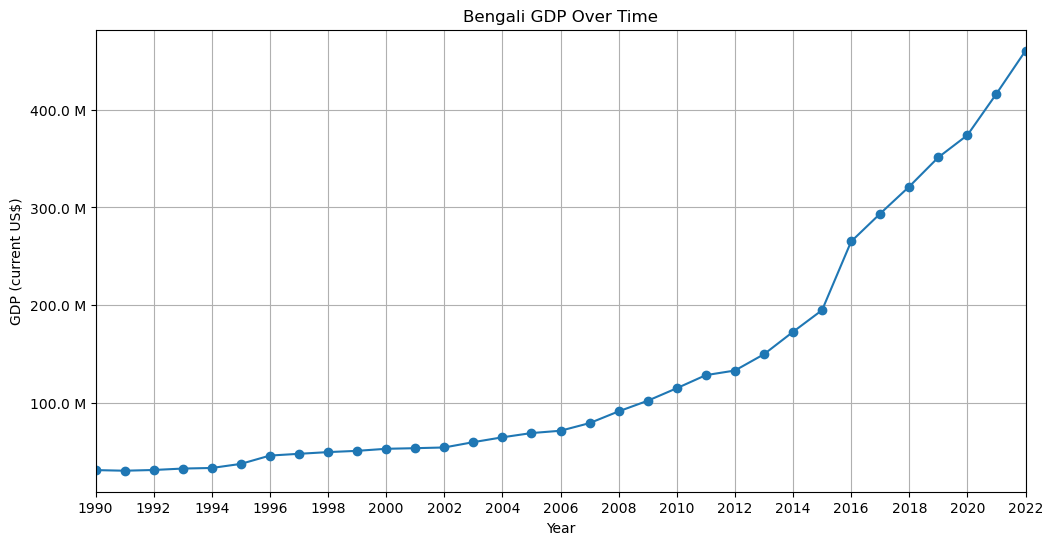

In [45]:

# Filter the DataFrame for China
Bangladesh_gdp = df_restructured[df_restructured['country_name'] == 'Bangladesh']

# Sort the DataFrame by year just in case it's not sorted
Bangladesh_gdp_sorted = Bangladesh_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(Bangladesh_gdp_sorted['year'], Bangladesh_gdp_sorted['gdp_(current_us$)'], marker='o')

# Add title and labels
plt.title('Bengali GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')

# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Format the y-axis to convert notation
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f} M'))

start_year = int(df_restructured['year'].min())
end_year = int(df_restructured['year'].max())

# Set x-axis to show ticks every 2 years
plt.xticks(range(start_year, end_year + 1, 2))

# Update the y-axis label
plt.ylabel('GDP (current US$)')

# Show the plot
plt.show()


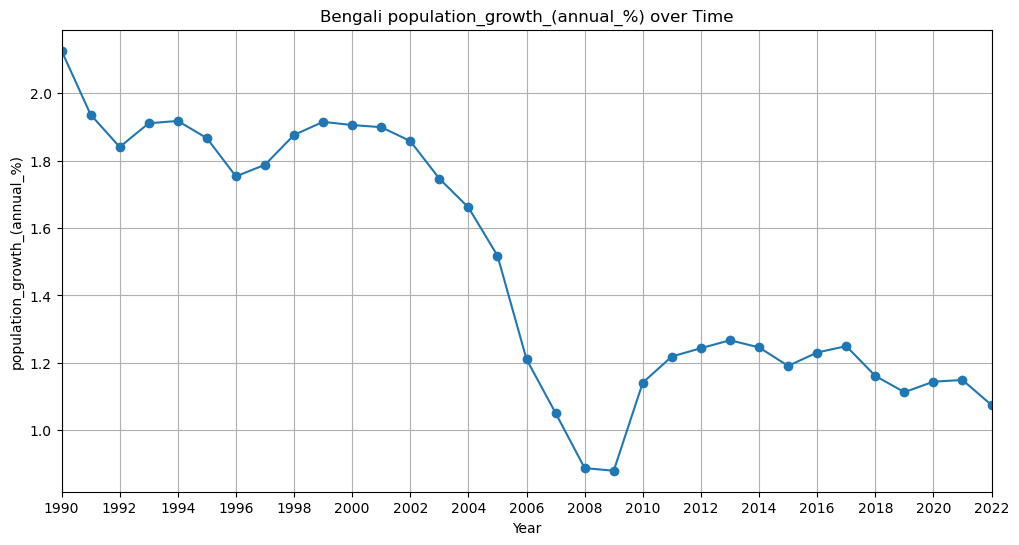

In [46]:

# Filter the DataFrame for China
Bangladesh_gdp = df_restructured[df_restructured['country_name'] == 'Bangladesh']

# Sort the DataFrame by year just in case it's not sorted
Bangladesh_gdp_sorted = Bangladesh_gdp.sort_values('year')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(Bangladesh_gdp_sorted['year'], Bangladesh_gdp_sorted['population_growth_(annual_%)'], marker='o')

# Add title and labels
plt.title('Bengali population_growth_(annual_%) over Time')
plt.xlabel('Year')
plt.ylabel('population_growth_(annual_%)')

start_year = int(df_restructured['year'].min())
end_year = int(df_restructured['year'].max())

# Set x-axis to show ticks every 2 years
plt.xticks(range(start_year, end_year + 1, 2))


# Optionally add a grid
plt.grid(True)
plt.margins(x=0)
# Show the plot
plt.show()

In [47]:
for column in df_restructured.columns:
    print(column)

country_name
country_code
year
births_attended_by_skilled_health_staff_(%_of_total)
fertility_rate_total_(births_per_woman)
gdp_(current_us$)
gdp_growth_(annual_%)
gdp_per_capita_(current_us$)
gini_index
labor_force_participation_rate_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate)
life_expectancy_at_birth_total_(years)
low-birthweight_babies_(%_of_births)
maternal_mortality_ratio_(national_estimate_per_100,000_live_births)
mortality_rate_infant_(per_1,000_live_births)
net_migration
population_ages_0-14_(%_of_total_population)
population_ages_15-64_(%_of_total_population)
population_ages_65_and_above_(%_of_total_population)
population_growth_(annual_%)
population_total
poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)
refugee_population_by_country_or_territory_of_asylum
wanted_fertility_rate_(births_per_woman)
women_making_their_own_informed_decisions_regarding_sexual_relations_contraceptive_use_and_reproductive_health_care_(%_of_women_age_15-49)
women_p

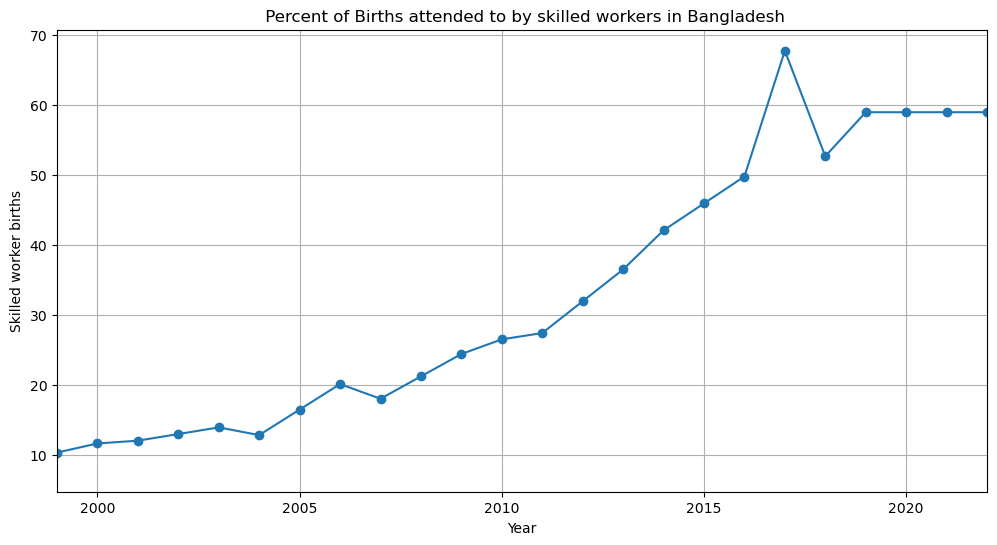

In [48]:
# Filter the DataFrame for Bangladesh
Bangladesh_gdp = df_restructured[df_restructured['country_name'] == 'Bangladesh']

# Sort the DataFrame by year
Bangladesh_gdp_sorted = Bangladesh_gdp.sort_values('year')

# Interpolate missing values
Bangladesh_gdp_sorted['births_attended_by_skilled_health_staff_(%_of_total)'] = Bangladesh_gdp_sorted['births_attended_by_skilled_health_staff_(%_of_total)'].interpolate()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(Bangladesh_gdp_sorted['year'], Bangladesh_gdp_sorted['births_attended_by_skilled_health_staff_(%_of_total)'], marker='o', linestyle='-')

# Add title and labels
plt.title(' Percent of Births attended to by skilled workers in Bangladesh')
plt.xlabel('Year')
plt.ylabel('Skilled worker births')

# Set x-axis to show ticks every 2 years
plt.xlim(1999, df_restructured['year'].max())

# Optionally add a grid
plt.grid(True)
plt.margins(x=0)

# Show the plot
plt.show()

- Noticing this downwards trend cerain countries like Sri Lanka and Bangladesh passed policies for women's reproductive health and rights. 
- They implemented programs that empowered women and provided them with safe family planning choices.
- The GDP in Bangladesh has increased by over 6 times over the last 20 years. Yet they were able to combat the decreasing population growth problem that comes with it.

- It is important we invest in further research to find why economic prosperity results in lower birth rates.
- And though it might not be a problem yet, if not checked it will become an exponentially more difficult one, as the demand for skilled labor increases, but the supply decreases.
- We can inact different policies to combat this problem such as the ones Bangladesh employed in 2009, or inacting policies that support more immigration.
- It can be hypothesisized that immigration had bolstered this countries population as more initiated Americans began to have less kids.
- More research would have to be done on this topic, but the data speaks for itself.

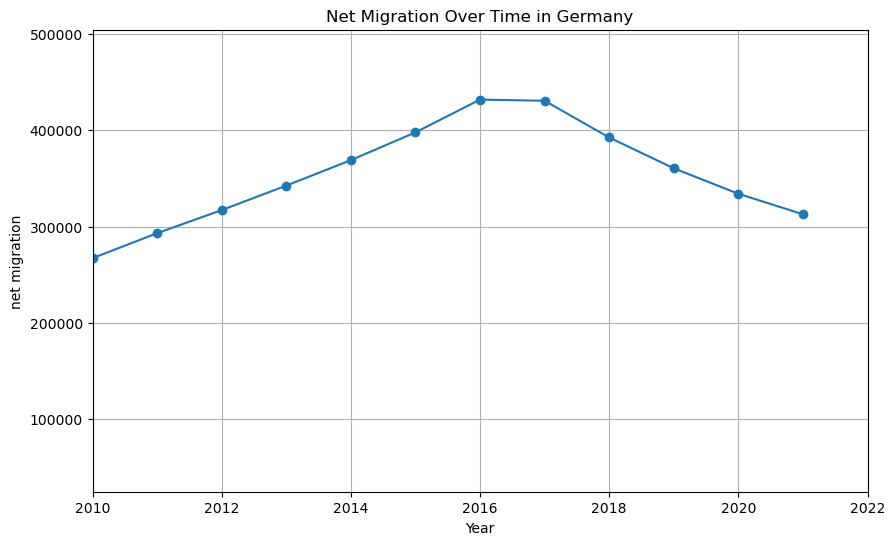

In [49]:
# Filter the DataFrame to include only the specified countries
df_Germany = df_restructured[df_restructured['country_name'] == 'Germany']

# Create a line graph
plt.figure(figsize=(10, 6))

# Plot each country's population growth over time

plt.plot(df_Germany['year'], df_Germany['net_migration'], label=country, marker='o')

plt.xlim(2010, df_restructured['year'].max())

# Add a legend, labels, and title
plt.xlabel('Year')
plt.ylabel('net migration')
plt.title('Net Migration Over Time in Germany')
plt.grid(True)

# Show the plot
plt.show()

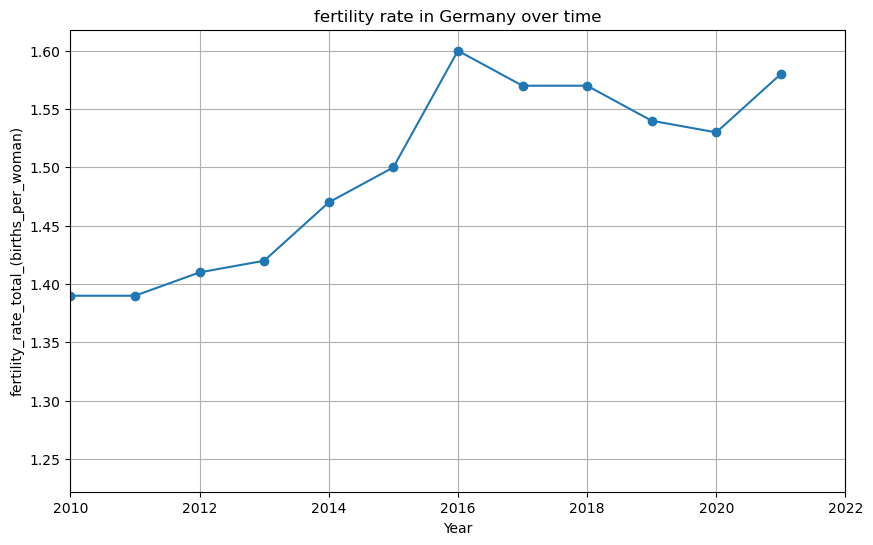

In [50]:
# List of specific countries to plot
country_data = df_restructured[df_restructured['country_name'] == 'Germany']

# Filter the DataFrame to include only the specified countries
df_selected_countries = df_restructured[df_restructured['country_name']== 'Germany']

# Create a line graph
plt.figure(figsize=(10, 6))


plt.plot(country_data['year'], country_data['fertility_rate_total_(births_per_woman)'], label=country, marker='o')

plt.xlim(2010, df_selected_countries['year'].max())

# Add a legend, labels, and title
plt.xlabel('Year')
plt.ylabel('fertility_rate_total_(births_per_woman)')
plt.title('fertility rate in Germany over time')
plt.grid(True)

# Show the plot
plt.show()

- Germany's fertility rate seems to be impacted by their net migration.

In [51]:
df_restructured.columns

Index(['country_name', 'country_code', 'year',
       'births_attended_by_skilled_health_staff_(%_of_total)',
       'fertility_rate_total_(births_per_woman)', 'gdp_(current_us$)',
       'gdp_growth_(annual_%)', 'gdp_per_capita_(current_us$)', 'gini_index',
       'labor_force_participation_rate_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate)',
       'life_expectancy_at_birth_total_(years)',
       'low-birthweight_babies_(%_of_births)',
       'maternal_mortality_ratio_(national_estimate_per_100,000_live_births)',
       'mortality_rate_infant_(per_1,000_live_births)', 'net_migration',
       'population_ages_0-14_(%_of_total_population)',
       'population_ages_15-64_(%_of_total_population)',
       'population_ages_65_and_above_(%_of_total_population)',
       'population_growth_(annual_%)', 'population_total',
       'poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)',
       'refugee_population_by_country_or_territory_of_asylum',
       'wanted_f

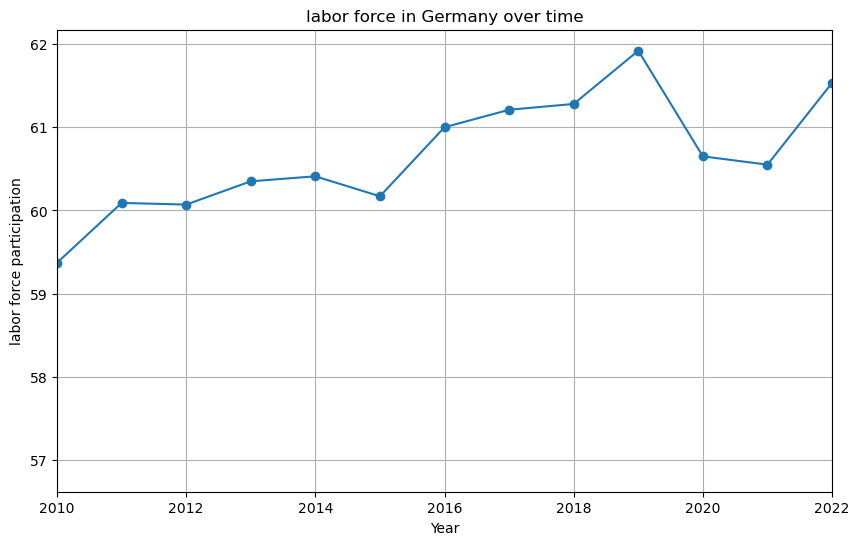

In [52]:
# List of specific countries to plot
country_data = df_restructured[df_restructured['country_name'] == 'Germany']

# Filter the DataFrame to include only the specified countries
df_selected_countries = df_restructured[df_restructured['country_name'] == 'Germany']

# Create a line graph
plt.figure(figsize=(10, 6))


plt.plot(country_data['year'], country_data['labor_force_participation_rate_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate)'], label=country, marker='o')

plt.xlim(2010, df_selected_countries['year'].max())

# Add a legend, labels, and title
plt.xlabel('Year')
plt.ylabel('labor force participation')
plt.title('labor force in Germany over time')
plt.grid(True)

# Show the plot
plt.show()